### House Price Prediction - Advanced Regression Assignment
By Dhandapani Subramanian

#### Problem Statement
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

Which variables are significant in predicting the price of a house,
How well those variables describe the price of a house.
Also, determine the optimal value of lambda for ridge and lasso regression

#### Business Goal
You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the dataset
house = pd.read_csv("train.csv")

In [3]:
# Display all rows and all columns for dataframe
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
# summary of the dataset: 1460 rows, 81 columns, with some missing values
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
house.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [6]:
# Shape of house data
house.shape

(1460, 81)

In [7]:
# double check for missing fields

house.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [8]:
# Percentage of missing data
rows, cols = house.shape
print("rows = ",rows, "columns =", cols)

(house.isnull().sum() / rows * 100 ).round(2)

rows =  1460 columns = 81


Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

Let us treate the missing value with respect to data definition. After decent analysis let us deside how to impute data or drop it if not needed


In [9]:
house.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [10]:
# let us analuse LotFrontage
house.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

<AxesSubplot:xlabel='LotFrontage'>

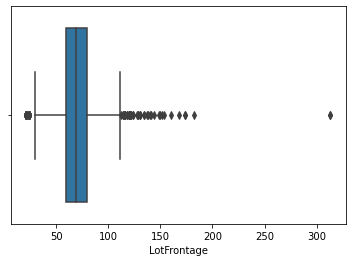

In [11]:
sns.boxplot(house.LotFrontage)

In [12]:
# we see 17.74% of the data is miising for LotFrontage 
# By Data defitition, LotFrontage: Linear feet of street connected to property
# in order to impute values for the missing LotFrontage we shall look into the Neighborhood and take the median of lotFrointage

house.LotFrontage = house.LotFrontage.fillna(house.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median() ) ) )


In [13]:
house.Neighborhood.unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

In [14]:
# Let us analyse Alley, with 93.77% missing data
# From data definition it Type of alley access to property, it can have values Grvl, Pave and NA.
house.Alley.unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [15]:
# We see the house with no alley has nan value in place of NA, so let us fill the nan with NA
house.Alley = house.Alley.fillna("NA")

In [16]:
""" 
 0.55 % of missing data in MasVnrType: Masonry veneer type, that can take values
       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone 
"""
# check unique values
house.MasVnrType.unique()

       

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [17]:
# CBlock seems to have been missed and nan had creeped in its place, so impute CBlock for nan
house.MasVnrType = house.MasVnrType.fillna('CBlock')

<AxesSubplot:xlabel='MasVnrArea'>

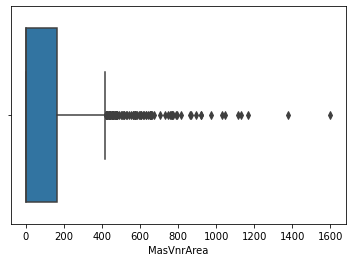

In [18]:
# MasVnrArea has 0.55% missing data
sns.boxplot(house.MasVnrArea)

In [19]:
# with the data definition, it looks like we can imped missing MasVnrArea with 0
house.MasVnrArea = house.MasVnrArea.fillna(0)

In [20]:
# BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2
print(house.BsmtQual.unique() )
print(house.BsmtCond.unique() )
print(house.BsmtExposure.unique() )
print(house.BsmtFinType1.unique() )
print(house.BsmtFinType2.unique() )


['Gd' 'TA' 'Ex' nan 'Fa']
['TA' 'Gd' nan 'Fa' 'Po']
['No' 'Gd' 'Mn' 'Av' nan]
['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']
['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']


In [21]:
# From data definition, it looks like these missing values represent no basements for those houses. 
# so it is ok to impute NA for  missing values of these columns
for i in ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'] :
    house[i]=house[i].fillna('NA')
    

In [22]:
# Electrical with 0.07% missing data
house.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [23]:
# We can impute with the mode
house.Electrical = house.Electrical.fillna(house.Electrical.mode()[0])

In [24]:
# FireplaceQu, 47.26% missing data, 
house.FireplaceQu.unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

From the data discription, we can see that there a catogary NA to specify the quqlity if there are no Fireplace; 
It is most likely the data for no Fireplace is left blank or missing. 
Let us compare number of fire places where FireplaceQu is missing to confirm

In [25]:
house[ (house.FireplaceQu.isna())].Fireplaces

0       0
5       0
10      0
12      0
15      0
17      0
18      0
19      0
26      0
29      0
30      0
31      0
32      0
36      0
38      0
39      0
42      0
43      0
44      0
47      0
48      0
49      0
50      0
52      0
56      0
57      0
59      0
60      0
61      0
63      0
64      0
67      0
68      0
71      0
73      0
74      0
75      0
76      0
77      0
78      0
79      0
81      0
83      0
87      0
88      0
89      0
90      0
91      0
92      0
94      0
96      0
97      0
98      0
99      0
102     0
103     0
106     0
107     0
108     0
110     0
117     0
121     0
122     0
123     0
125     0
129     0
132     0
133     0
137     0
139     0
141     0
142     0
143     0
144     0
145     0
146     0
148     0
149     0
150     0
154     0
155     0
156     0
160     0
163     0
164     0
165     0
170     0
179     0
183     0
184     0
186     0
187     0
191     0
192     0
193     0
194     0
198     0
200     0
202     0
204     0


This clearly shows that FireplaceQu is nan when there is no fireplace i.e 0
So we can impute them with NA

In [26]:
# This clearly shows that FireplaceQu is nan when there is no fireplace i.e 0
# So we can impute them with NA
house.FireplaceQu = house.FireplaceQu.fillna('NA')

In [27]:
# 'GarageType','GarageYrBlt',  'GarageFinish', 'GarageQual', 'GarageCond'
for i in ['GarageType','GarageYrBlt',  'GarageFinish', 'GarageQual', 'GarageCond'] :
    print(house[i].unique())

['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']
[2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006. 1960. 1991. 1970. 1967. 1958. 1930. 2002. 1968. 2007. 2008.
 1957. 1920. 1966. 1959. 1995. 1954. 1953.   nan 1983. 1977. 1997. 1985.
 1963. 1981. 1964. 1999. 1935. 1990. 1945. 1987. 1989. 1915. 1956. 1948.
 1974. 2009. 1950. 1961. 1921. 1900. 1979. 1951. 1969. 1936. 1975. 1971.
 1923. 1984. 1926. 1955. 1986. 1988. 1916. 1932. 1972. 1918. 1980. 1924.
 1996. 1940. 1949. 1994. 1910. 1978. 1982. 1992. 1925. 1941. 2010. 1927.
 1947. 1937. 1942. 1938. 1952. 1928. 1922. 1934. 1906. 1914. 1946. 1908.
 1929. 1933.]
['RFn' 'Unf' 'Fin' nan]
['TA' 'Fa' 'Gd' nan 'Ex' 'Po']
['TA' 'Fa' nan 'Gd' 'Po' 'Ex']


From data dictionary, the house does not have a garage has missing values for these fields.
['GarageType','GarageYrBlt',  'GarageFinish', 'GarageQual', 'GarageCond']

In [28]:
# From data dictionary, the house does not have a garage has missing values for these fields.
# Let us impute NA for these fields
# GarageYrBlt is a catogorical value showing the year of built, which can floored to 1900 when no garage were built
for i in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'] :
    house[i] = house[i].fillna('NA')
    
house['GarageYrBlt'] = house['GarageYrBlt'].fillna(1900)


In [29]:
# 'GarageType','GarageYrBlt',  'GarageFinish', 'GarageQual', 'GarageCond'
for i in ['GarageType','GarageYrBlt',  'GarageFinish', 'GarageQual', 'GarageCond'] :
    print(house[i].unique())

['Attchd' 'Detchd' 'BuiltIn' 'CarPort' 'NA' 'Basment' '2Types']
[2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006. 1960. 1991. 1970. 1967. 1958. 1930. 2002. 1968. 2007. 2008.
 1957. 1920. 1966. 1959. 1995. 1954. 1953. 1900. 1983. 1977. 1997. 1985.
 1963. 1981. 1964. 1999. 1935. 1990. 1945. 1987. 1989. 1915. 1956. 1948.
 1974. 2009. 1950. 1961. 1921. 1979. 1951. 1969. 1936. 1975. 1971. 1923.
 1984. 1926. 1955. 1986. 1988. 1916. 1932. 1972. 1918. 1980. 1924. 1996.
 1940. 1949. 1994. 1910. 1978. 1982. 1992. 1925. 1941. 2010. 1927. 1947.
 1937. 1942. 1938. 1952. 1928. 1922. 1934. 1906. 1914. 1946. 1908. 1929.
 1933.]
['RFn' 'Unf' 'Fin' 'NA']
['TA' 'Fa' 'Gd' 'NA' 'Ex' 'Po']
['TA' 'Fa' 'NA' 'Gd' 'Po' 'Ex']


In [30]:
# PoolQC with 99.52% missing data
house.PoolQC.unique()


array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

PoolQC has 99.52% missing data, as per data definition, we will have to check both PoolQC as well as PoolArea to deside about missing value

In [31]:
# with data definition we will have to check both PoolQC as well as PoolArea to deside about missing value
house.PoolQC.value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

We see only 7 houses has PoolQC, remaining houses missing this data:
Let us compare PoolArea to see if the missing PoolQC corresponding to missing pools 

In [32]:
house.PoolArea.value_counts()
# We see only 7 houses has pools remaining houses do not have it and its corresponding quality is missing in PoolQC

0      1453
512       1
648       1
576       1
555       1
480       1
519       1
738       1
Name: PoolArea, dtype: int64

We see only 7 houses has pools remaining houses do not have it and its corresponding quality is missing in PoolQC

In [33]:
house[[ 'PoolQC','PoolArea']][ ~(house.PoolQC.isna()) ] 
# with the result, we see there are only 7 houses with pools, and remaining 1453 houses with no pools forwhere PoolQC is nan 

PoolQC  PoolArea
197      Ex       512
810      Fa       648
1170     Gd       576
1182     Ex       555
1298     Gd       480
1386     Fa       519
1423     Gd       738

with the result, we see there are only 7 houses with pools, and remaining 1453 houses with no pools for PoolQC is nan 

In [34]:
house[[ 'PoolQC','PoolArea']][ (house.PoolQC.isna()) ] 

PoolQC  PoolArea
0       NaN         0
1       NaN         0
2       NaN         0
3       NaN         0
4       NaN         0
5       NaN         0
6       NaN         0
7       NaN         0
8       NaN         0
9       NaN         0
10      NaN         0
11      NaN         0
12      NaN         0
13      NaN         0
14      NaN         0
15      NaN         0
16      NaN         0
17      NaN         0
18      NaN         0
19      NaN         0
20      NaN         0
21      NaN         0
22      NaN         0
23      NaN         0
24      NaN         0
25      NaN         0
26      NaN         0
27      NaN         0
28      NaN         0
29      NaN         0
30      NaN         0
31      NaN         0
32      NaN         0
33      NaN         0
34      NaN         0
35      NaN         0
36      NaN         0
37      NaN         0
38      NaN         0
39      NaN         0
40      NaN         0
41      NaN         0
42      NaN         0
43      NaN         0
44      NaN         0
45      NaN         0
46      NaN         0
47      NaN         0
48      NaN         0
49      NaN         0
50      NaN         0
51      NaN         0
52      NaN         0
53      NaN         0
54      NaN         0
55      NaN         0
56      NaN         0
57      NaN         0
58      NaN         0
59      NaN         0
60      NaN         0
61      NaN         0
62      NaN         0
63      NaN         0
64      NaN         0
65      NaN         0
66      NaN         0
67      NaN         0
68      NaN         0
69      NaN         0
70      NaN         0
71      NaN         0
72      NaN         0
73      NaN         0
74      NaN         0
75      NaN         0
76      NaN         0
77      NaN         0
78      NaN         0
79      NaN         0
80      NaN         0
81      NaN         0
82      NaN         0
83      NaN         0
84      NaN         0
85      NaN         0
86      NaN         0
87      NaN         0
88      NaN         0
89      NaN         0
90      NaN         0
91      NaN         0
92      NaN         0
93      NaN         0
94      NaN         0
95      NaN         0
96      NaN         0
97      NaN         0
98      NaN         0
99      NaN         0
100     NaN         0
101     NaN         0
102     NaN         0
103     NaN         0
104     NaN         0
105     NaN         0
106     NaN         0
107     NaN         0
108     NaN         0
109     NaN         0
110     NaN         0
111     NaN         0
112     NaN         0
113     NaN         0
114     NaN         0
115     NaN         0
116     NaN         0
117     NaN         0
118     NaN         0
119     NaN         0
120     NaN         0
121     NaN         0
122     NaN         0
123     NaN         0
124     NaN         0
125     NaN         0
126     NaN         0
127     NaN         0
128     NaN         0
129     NaN         0
130     NaN         0
131     NaN         0
132     NaN         0
133     NaN         0
134     NaN         0
135     NaN         0
136     NaN         0
137     NaN         0
138     NaN         0
139     NaN         0
140     NaN         0
141     NaN         0
142     NaN         0
143     NaN         0
144     NaN         0
145     NaN         0
146     NaN         0
147     NaN         0
148     NaN         0
149     NaN         0
150     NaN         0
151     NaN         0
152     NaN         0
153     NaN         0
154     NaN         0
155     NaN         0
156     NaN         0
157     NaN         0
158     NaN         0
159     NaN         0
160     NaN         0
161     NaN         0
162     NaN         0
163     NaN         0
164     NaN         0
165     NaN         0
166     NaN         0
167     NaN         0
168     NaN         0
169     NaN         0
170     NaN         0
171     NaN         0
172     NaN         0
173     NaN         0
174     NaN         0
175     NaN         0
176     NaN         0
177     NaN         0
178     NaN         0
179     NaN         0
180     NaN         0
1

remaining 1453 houses with no pools has poolArea is 0 and PoolQC is nan , So We can impute NA to the missing PoolQC values

In [35]:
# We can impute NA to the missing PoolQC values, which represent "no pool"
house.PoolQC = house.PoolQC.fillna('NA')

In [36]:
# Fence with 80.75% missing values, 
house.Fence.unique()

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [37]:
house.Fence.value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

From data dictionary, we see that there is another catogary for No fence,  it looks like the 80.75% houses from our dataset having no fence are missing this detail. We can go ahead and impute NA to the missing falues for Fence

In [38]:
# Let us impute NA to the missing value for Fence
house.Fence = house.Fence.fillna("NA")

In [39]:
# MiscFeature 96.3% missing data, from dictionary these are Miscellaneous feature not covered in other categories
house.MiscFeature.unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [40]:
house.MiscFeature.value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

For houses with no special feature seems to have this field MiscFeature left missing. So we can impute NA for them

In [41]:
# imputing NA to missing MiscFeature
house.MiscFeature = house.MiscFeature.fillna("NA")

In [42]:
# Let us now check info and confirm that no data is missing now.

house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [43]:
# checking for duplicate records 
house.duplicated().value_counts()

False    1460
dtype: int64

Now there is no Missing data in columns nor any duplicate record in our dataset.
We shall now understand catogorised and numerical datas. Derive new colums if needed


### Data exploration, cleaning and derived metrics

In [44]:
#Let us capture all initial features
all_columns_initial = house.columns
print(all_columns_initial)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

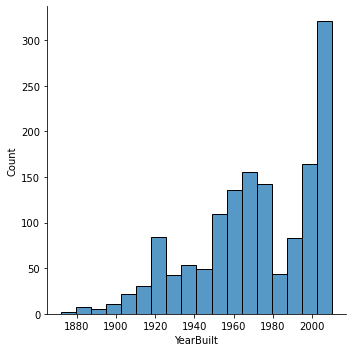

In [45]:
#Let us analise the numeric data of years
# 'YearBuilt','YearRemodAdd','YrSold','GarageYrBlt'
sns.displot(house.YearBuilt)

In [46]:
house.YearRemodAdd.value_counts()

1950    178
2006     97
2007     76
2005     73
2004     62
2000     55
2003     51
2002     48
2008     40
1996     36
1998     36
1995     31
1976     30
1999     30
1970     26
1977     25
1997     25
2009     23
1994     22
2001     21
1972     20
1965     19
1993     19
1959     18
1971     18
1992     17
1968     17
1978     16
1966     15
1958     15
1990     15
1969     14
1954     14
1991     14
1962     14
1963     13
1960     12
1980     12
1967     12
1973     11
1989     11
1964     11
1953     10
1979     10
1987     10
1956     10
1975     10
1955      9
1957      9
1985      9
1988      9
1981      8
1961      8
1984      7
1982      7
1974      7
2010      6
1986      5
1952      5
1983      5
1951      4
Name: YearRemodAdd, dtype: int64

In [47]:
house[['YearBuilt','GarageYrBlt','YearRemodAdd','YrSold'] ]

YearBuilt  GarageYrBlt  YearRemodAdd  YrSold
0          2003       2003.0          2003    2008
1          1976       1976.0          1976    2007
2          2001       2001.0          2002    2008
3          1915       1998.0          1970    2006
4          2000       2000.0          2000    2008
5          1993       1993.0          1995    2009
6          2004       2004.0          2005    2007
7          1973       1973.0          1973    2009
8          1931       1931.0          1950    2008
9          1939       1939.0          1950    2008
10         1965       1965.0          1965    2008
11         2005       2005.0          2006    2006
12         1962       1962.0          1962    2008
13         2006       2006.0          2007    2007
14         1960       1960.0          1960    2008
15         1929       1991.0          2001    2007
16         1970       1970.0          1970    2010
17         1967       1967.0          1967    2006
18         2004       2004.0          2004    2008
19         1958       1958.0          1965    2009
20         2005       2005.0          2006    2006
21         1930       1930.0          1950    2007
22         2002       2002.0          2002    2008
23         1976       1976.0          1976    2007
24         1968       1968.0          2001    2010
25         2007       2007.0          2007    2009
26         1951       2005.0          2000    2010
27         2007       2008.0          2008    2010
28         1957       1957.0          1997    2006
29         1927       1920.0          1950    2008
30         1920       1920.0          1950    2008
31         1966       1966.0          2006    2008
32         2007       2007.0          2007    2008
33         1959       1959.0          1959    2010
34         2005       2005.0          2005    2007
35         2004       2004.0          2005    2006
36         1994       1995.0          1995    2009
37         1954       1954.0          1990    2009
38         1953       1953.0          2007    2010
39         1955       1900.0          1955    2008
40         1965       1965.0          1965    2006
41         1959       1959.0          1959    2007
42         1983       1983.0          1983    2007
43         1975       1977.0          1980    2008
44         1959       1959.0          1959    2006
45         2005       2005.0          2005    2010
46         2003       2003.0          2003    2009
47         2006       2006.0          2006    2007
48         1920       1900.0          2008    2009
49         1966       1966.0          1966    2007
50         1997       1997.0          1997    2007
51         1934       1985.0          1950    2006
52         1963       1963.0          1963    2010
53         1981       1981.0          1987    2006
54         1955       1962.0          1955    2007
55         1964       1964.0          1964    2008
56         1999       1999.0          2000    2009
57         2004       2004.0          2004    2006
58         2006       2006.0          2006    2006
59         1972       1973.0          1972    2008
60         2004       2006.0          2004    2006
61         1920       1935.0          1996    2007
62         2006       2006.0          2006    2007
63         1921       1990.0          1950    2010
64         1997       1998.0          1998    2009
65         2004       2004.0          2005    2007
66         1970       1970.0          1989    2010
67         2003       2003.0          2003    2007
68         1945       1945.0          1950    2010
69         1953       1953.0          1953    2006
70         1973       1973.0          1973    2007
71         1982       1987.0          2006    2007
72         1998       1998.0          1998    2009
73         1954       1989.0          2003    2010
74         1915       1915.0          1950    2010
75         1973       1973.0          1973    2009
76         1956       1956.0          1956    2008
77         1948       1948.0

In [48]:
# Let us derive age features from these catogorical ones
# houseAge = years from YearsBuilt till YrSold , 
# as the price was paid at the year it got sold, we shall calculate the age on the year of sale

house['houseAge'] = house['YrSold'] - house['YearBuilt']

# YearRemodAdd Remodel date (same as construction date if no remodeling or additions)
# houseRemodelAge = YrSold - YearRemodAdd 

house['houseRemodelAge'] = house['YrSold'] - house['YearRemodAdd']

# GarageAge = YrSold - GarageYrBlt
house['GarageAge'] = house['YrSold'] - house['GarageYrBlt']



In [49]:
# Compare the columns side by side
house[['YearBuilt','GarageYrBlt','YearRemodAdd','YrSold', 'houseAge', 'houseRemodelAge', 'GarageAge'] ]

YearBuilt  GarageYrBlt  YearRemodAdd  YrSold  houseAge  houseRemodelAge  \
0          2003       2003.0          2003    2008         5                5   
1          1976       1976.0          1976    2007        31               31   
2          2001       2001.0          2002    2008         7                6   
3          1915       1998.0          1970    2006        91               36   
4          2000       2000.0          2000    2008         8                8   
5          1993       1993.0          1995    2009        16               14   
6          2004       2004.0          2005    2007         3                2   
7          1973       1973.0          1973    2009        36               36   
8          1931       1931.0          1950    2008        77               58   
9          1939       1939.0          1950    2008        69               58   
10         1965       1965.0          1965    2008        43               43   
11         2005       2005.0          2006    2006         1                0   
12         1962       1962.0          1962    2008        46               46   
13         2006       2006.0          2007    2007         1                0   
14         1960       1960.0          1960    2008        48               48   
15         1929       1991.0          2001    2007        78                6   
16         1970       1970.0          1970    2010        40               40   
17         1967       1967.0          1967    2006        39               39   
18         2004       2004.0          2004    2008         4                4   
19         1958       1958.0          1965    2009        51               44   
20         2005       2005.0          2006    2006         1                0   
21         1930       1930.0          1950    2007        77               57   
22         2002       2002.0          2002    2008         6                6   
23         1976       1976.0          1976    2007        31               31   
24         1968       1968.0          2001    2010        42                9   
25         2007       2007.0          2007    2009         2                2   
26         1951       2005.0          2000    2010        59               10   
27         2007       2008.0          2008    2010         3                2   
28         1957       1957.0          1997    2006        49                9   
29         1927       1920.0          1950    2008        81               58   
30         1920       1920.0          1950    2008        88               58   
31         1966       1966.0          2006    2008        42                2   
32         2007       2007.0          2007    2008         1                1   
33         1959       1959.0          1959    2010        51               51   
34         2005       2005.0          2005    2007         2                2   
35         2004       2004.0          2005    2006         2                1   
36         1994       1995.0          1995    2009        15               14   
37         1954       1954.0          1990    2009        55               19   
38         1953       1953.0          2007    2010        57                3   
39         1955       1900.0          1955    2008        53               53   
40         1965       1965.0          1965    2006        41               41   
41         1959       1959.0          1959    2007        48               48   
42         1983       1983.0          1983    2007        24               24   
43         1975       1977.0          1980    2008        33               28   
44         1959       1959.0          1959    2006        47               47   
45         2005       2005.0          2005    2010         5                5   
46         2003       2003.0          2003    2009         6                6   
47         2006       2006.0          2006    2007         1                1   
48         1920       1900.0         

In [50]:
# Let us build a list of columns that holds the columns that needs to be dropped
Cols_to_delete = ['YearBuilt', 'GarageYrBlt', 'YearRemodAdd', 'YrSold']


As we have new columns for houseAge, houseRemodelAge and GarageAge,
we can drop the original redundant comumns of 'YearBuilt','GarageYrBlt','YearRemodAdd','YrSold'

In [51]:
house = house.drop( ['YearBuilt', 'GarageYrBlt', 'YearRemodAdd', 'YrSold'], axis=1 )

In [52]:
# Id column is just an index that would not help in prediction 
Cols_to_delete.append('Id')
print(Cols_to_delete)
house = house.drop('Id' , axis='columns')

['YearBuilt', 'GarageYrBlt', 'YearRemodAdd', 'YrSold', 'Id']


In [53]:
# creating total built sqfootage feature totalBuiltSF =TotalBsmtSF + 1stFlrSF +2ndFlrSF
house['totalBuiltSF'] = house['TotalBsmtSF'] + house['1stFlrSF'] + house['2ndFlrSF']

In [54]:
house[ ['TotalBsmtSF', '1stFlrSF' , '2ndFlrSF', 'totalBuiltSF' ] ].head()

TotalBsmtSF  1stFlrSF  2ndFlrSF  totalBuiltSF
0          856       856       854          2566
1         1262      1262         0          2524
2          920       920       866          2706
3          756       961       756          2473
4         1145      1145      1053          3343

As we now have the derived feature totalBuiltSF, we can drop 'TotalBsmtSF', '1stFlrSF' and '2ndFlrSF'

In [55]:
# Dropping 'TotalBsmtSF', '1stFlrSF' and '2ndFlrSF'
Cols_to_delete.extend([ 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF'])
print(Cols_to_delete)

['YearBuilt', 'GarageYrBlt', 'YearRemodAdd', 'YrSold', 'Id', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF']


In [56]:
house = house.drop([ 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF'], axis='columns' )

In [57]:
# We see Utilities has all same value almost, so it will not help in prediction,
house.Utilities.value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

Dropping the utilities feature, as it has all same value

In [58]:
# Drop Utilities
house= house.drop('Utilities', axis='columns')

In [59]:
Cols_to_delete.append('Utilities')

In [60]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MSSubClass       1460 non-null   int64  
 1   MSZoning         1460 non-null   object 
 2   LotFrontage      1460 non-null   float64
 3   LotArea          1460 non-null   int64  
 4   Street           1460 non-null   object 
 5   Alley            1460 non-null   object 
 6   LotShape         1460 non-null   object 
 7   LandContour      1460 non-null   object 
 8   LotConfig        1460 non-null   object 
 9   LandSlope        1460 non-null   object 
 10  Neighborhood     1460 non-null   object 
 11  Condition1       1460 non-null   object 
 12  Condition2       1460 non-null   object 
 13  BldgType         1460 non-null   object 
 14  HouseStyle       1460 non-null   object 
 15  OverallQual      1460 non-null   int64  
 16  OverallCond      1460 non-null   int64  
 17  RoofStyle     

In [61]:
house.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave    NA      Reg   
1          20       RL         80.0     9600   Pave    NA      Reg   
2          60       RL         68.0    11250   Pave    NA      IR1   
3          70       RL         60.0     9550   Pave    NA      IR1   
4          60       RL         84.0    14260   Pave    NA      IR1   

  LandContour LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0         Lvl    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1         Lvl       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2         Lvl    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3         Lvl    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4         Lvl       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond RoofStyle RoofMatl Exterior1st  \
0     2Story            7            5     Gable  CompShg     VinylSd   
1     1Story            6            8     Gable  CompShg     MetalSd   
2     2Story            7            5     Gable  CompShg     VinylSd   
3     2Story            7            5     Gable  CompShg     Wd Sdng   
4     2Story            8            5     Gable  CompShg     VinylSd   

  Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd    BrkFace       196.0        Gd        TA      PConc       Gd   
1     MetalSd       None         0.0        TA        TA     CBlock       Gd   
2     VinylSd    BrkFace       162.0        Gd        TA      PConc       Gd   
3     Wd Shng       None         0.0        TA        TA     BrkTil       TA   
4     VinylSd    BrkFace       350.0        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
0       TA           No          GLQ         706          Unf           0   
1       TA           Gd          ALQ         978          Unf           0   
2       TA           Mn          GLQ         486          Unf           0   
3       Gd           No          ALQ         216          Unf           0   
4       TA           Av          GLQ         655          Unf           0   

   BsmtUnfSF Heating HeatingQC CentralAir Electrical  LowQualFinSF  GrLivArea  \
0        150    GasA        Ex          Y      SBrkr             0       1710   
1        284    GasA        Ex          Y      SBrkr             0       1262   
2        434    GasA        Ex          Y      SBrkr             0       1786   
3        540    GasA        Gd          Y      SBrkr             0       1717   
4        490    GasA        Ex          Y      SBrkr             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  \
0          Gd             8        Typ           0          NA     Attchd   
1          TA             6        Typ           1          TA     Attchd   
2          Gd             6        Typ           1          TA     Attchd   
3          Gd             7        Typ           1          Gd     Detchd   
4          Gd             9        Typ           1          TA     Attchd   

  GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
0          RFn           2         548         TA         TA          Y   
1          RFn           2         460         TA         TA          Y   
2          RFn           2         608         TA 

In [62]:
house.OverallQual.value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

In [63]:
# MSSubClass ,OverallQual, OverallCond; MoSold are a catogorical feature as per the data description
house['MSSubClass'] = house['MSSubClass'].astype("object")
house['OverallQual'] = house['OverallQual'].astype("object")
house['OverallCond'] = house['OverallCond'].astype("object")
house['MoSold'] = house['MoSold'].astype("object")

Converting MSSubClass ,OverallQual, OverallCond, MoSold catogorical feature from numeric to object data type

In [64]:
house['OverallQual'].value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

In [65]:
house['OverallCond'].value_counts()

5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64

let us convert OverallQual to OverallQualRating with 1 - 3 = low ; 4-6 = average ; 7-10 = good
also OverallCond to OverallCondRating with 1 - 3 = low ; 4-6 = average ; 7-10 = good

In [66]:
def cus_rating(x):
    if x <= 3 :
        return 'low'
    elif 4<= x & x <= 6:
        return 'average'
    else:
        return 'good'

In [67]:
house['OverallQualRating'] = house.OverallQual.apply(lambda x: cus_rating(x))
house['OverallCondRating'] = house.OverallCond.apply(lambda x: cus_rating(x))

In [68]:
house[ ['OverallQualRating', 'OverallQual'] ].sample(5)

OverallQualRating OverallQual
933              good           7
698           average           5
736               low           3
681           average           5
814           average           5

In [69]:
house[ ['OverallCondRating', 'OverallCond'] ].sample(5)

OverallCondRating OverallCond
1381              good           7
689            average           5
266            average           5
1111           average           6
615               good           7

As we have OverallCondRating and OverallQualRating we can go ahead and drop OverallCond and OverallQual

In [70]:
Cols_to_delete.extend([ 'OverallCond', 'OverallQual'])
print(Cols_to_delete)

['YearBuilt', 'GarageYrBlt', 'YearRemodAdd', 'YrSold', 'Id', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'Utilities', 'OverallCond', 'OverallQual']


In [71]:
house = house.drop([ 'OverallCond', 'OverallQual'] , axis=1 )

In [72]:
# Let us find all numeric features
cols_numeric = house.select_dtypes(include=['float64', 'int64']).columns
print(cols_numeric)


Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'SalePrice', 'houseAge', 'houseRemodelAge', 'GarageAge',
       'totalBuiltSF'],
      dtype='object')


In [73]:
# Let us find all catogorical features
cols_catogoric = house.select_dtypes(include=['object']).columns
print(cols_catogoric)

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold',
       'SaleType', 'SaleCondition', 'OverallQualRating', 'OverallCondRating'],
      dtype='object')


In [74]:
house.shape

(1460, 76)

In [75]:
# let us see if any catogorical var has all same values
# if any catogorical value is more than 90% we will have to check in further and if needed can be deleted

rec90percent = house.shape[0] * 90 // 100
high_density_cols = []
for cols in cols_catogoric:
    print(house[cols].value_counts())
    if house[cols].value_counts().max() >= rec90percent :
        high_density_cols.append(cols)

print("Highly dense columns are ")
print(high_density_cols)
        

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
Pave    1454
Grvl       6
Name: Street, dtype: int64
NA      1369
Grvl      50
Pave      41
Name: Alley, dtype: int64
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr 

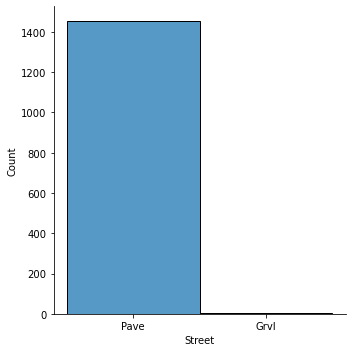

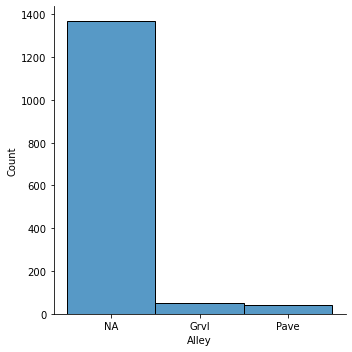

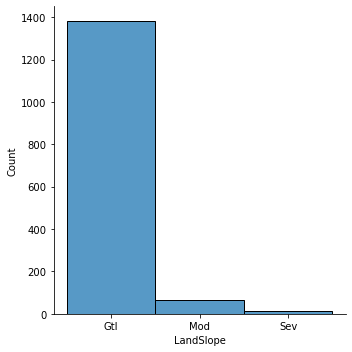

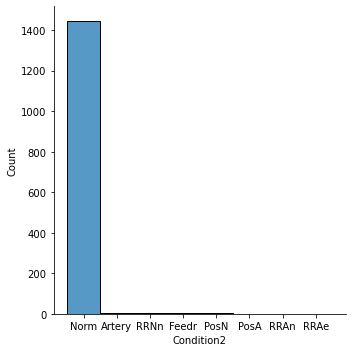

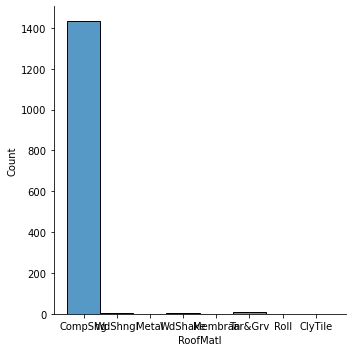

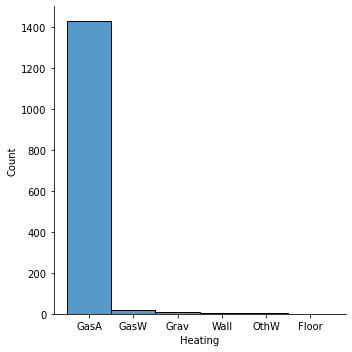

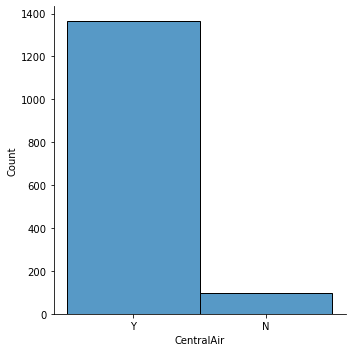

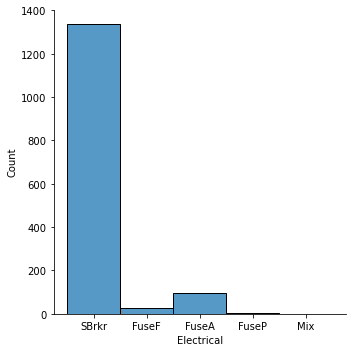

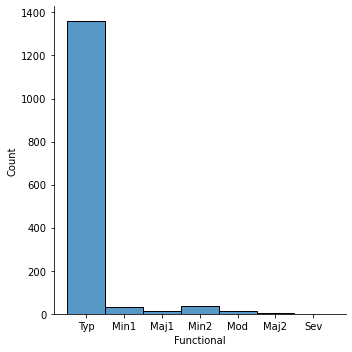

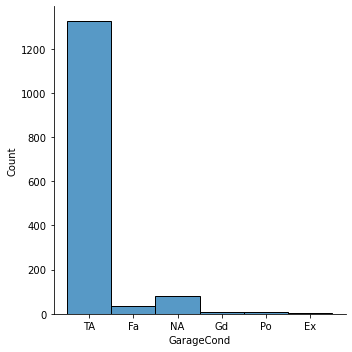

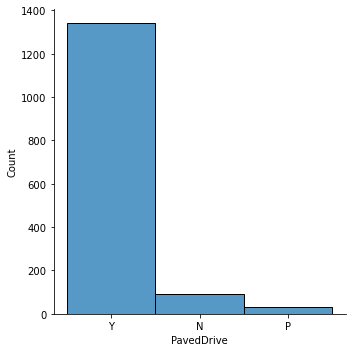

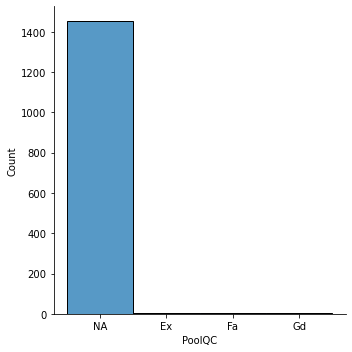

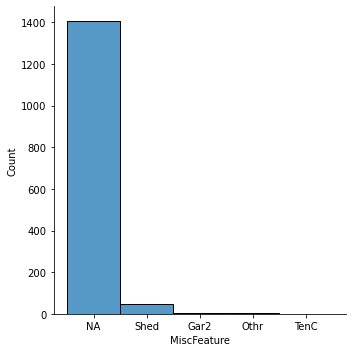

In [76]:
# Check for the high_density_cols graphically

for i in high_density_cols :
    sns.displot(house[i]);
    

Features 'Street', 'Alley', 'LandSlope', 'Condition2', 'RoofMatl', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageCond', 'PavedDrive', 'PoolQC', 'MiscFeature' are having more than 90% of same values.
These high_density_cols would not help in predicting the trend correctly so we can safely drop them

In [77]:
# Let us delete the high_density_cols columns 
Cols_to_delete.extend(high_density_cols )

house = house.drop(high_density_cols , axis=1)


In [78]:
# update list of catogic features with the remaining columns

cols_catogoric = house.select_dtypes(include=['object']).columns
print(cols_catogoric)

Index(['MSSubClass', 'MSZoning', 'LotShape', 'LandContour', 'LotConfig',
       'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'Fence', 'MoSold', 'SaleType',
       'SaleCondition', 'OverallQualRating', 'OverallCondRating'],
      dtype='object')


In [79]:
print("Shape of data :" , end='')
print(house.shape)

Shape of data :(1460, 63)


In [80]:
#### Univariate, bivariate and multivariat analysis

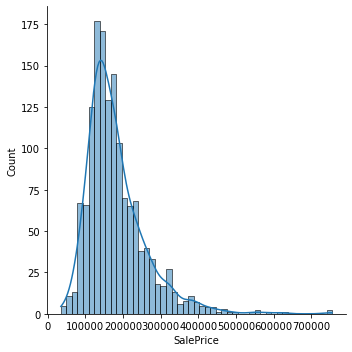

In [81]:
sns.displot(house['SalePrice'],  kde=True)

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

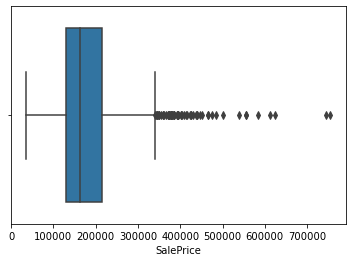

In [82]:
sns.boxplot(house['SalePrice'])
house['SalePrice'].describe()

#### We see the target variable is not normaly distributed.
It has an average of 163000 and maximum of 755000
There are few outlayers in the data.

In [83]:
# in order to scale the SalePrice to managable range let us use log transformation 
# salePriceLog is our new transformed target variable

house['salePriceLog'] = np.log(house['SalePrice'])

In [84]:
house['salePriceLog'].describe()

count    1460.000000
mean       12.024051
std         0.399452
min        10.460242
25%        11.775097
50%        12.001505
75%        12.273731
max        13.534473
Name: salePriceLog, dtype: float64

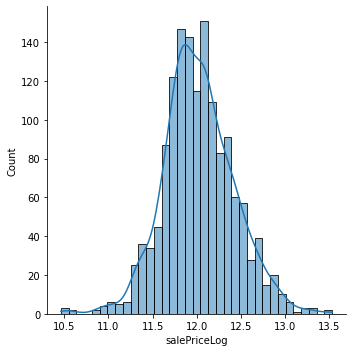

In [85]:
sns.displot(house['salePriceLog'],  kde=True)


#### Transformed salePrice is distributed decently normal
We can go ahead at use this as the target variable

#### sns.pairplot(house)
#### There are len(cols_numeric) = 30 numeric features, and pairplot will create 30 x 30 = 900

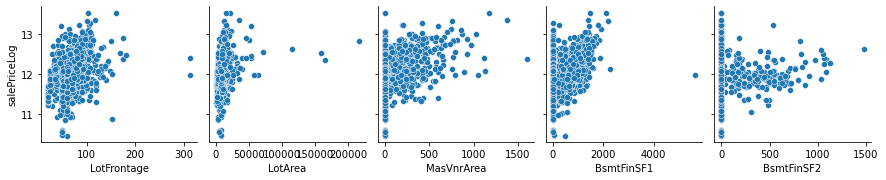

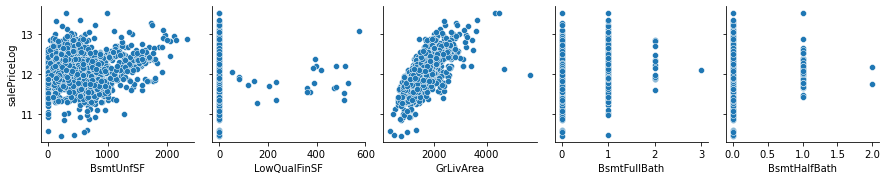

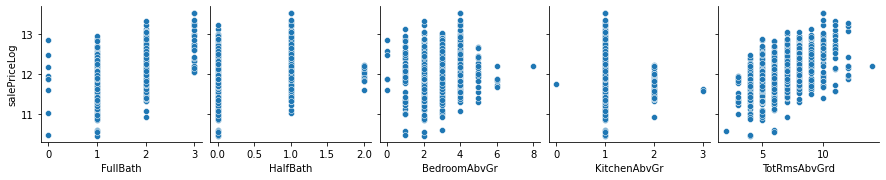

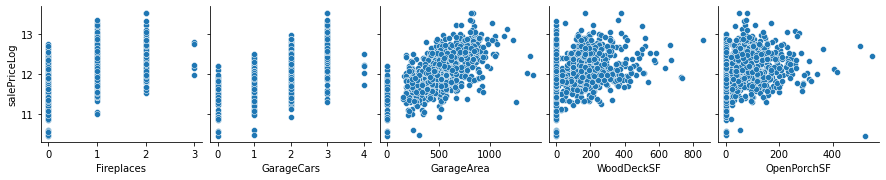

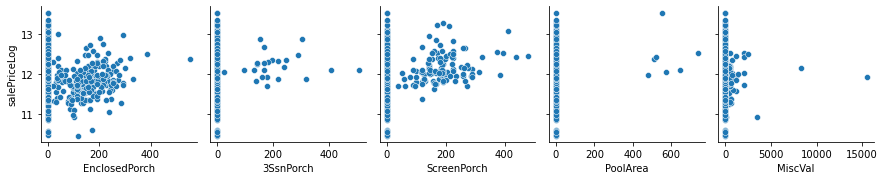

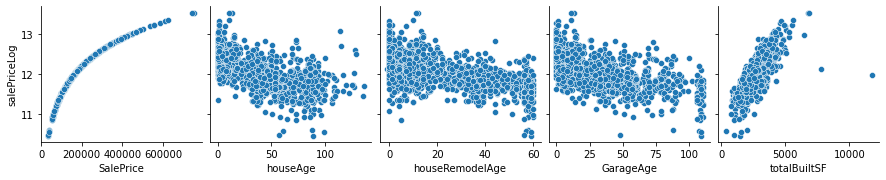

In [86]:
# instead we shall built the pair plot with respect to the target variable SalePrice to view relation between them
for i in range(6):
    sns.pairplot(house, x_vars=cols_numeric[5*i+0 :5*i+5] , y_vars=['salePriceLog']  )
    plt.show()

    



In [87]:
# Year sold
# s.pairplot(house[cols_numeric])
house[cols_numeric].corr()

LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
LotFrontage         1.000000  0.335957    0.195830    0.232576    0.052237   
LotArea             0.335957  1.000000    0.103321    0.214103    0.111170   
MasVnrArea          0.195830  0.103321    1.000000    0.261256   -0.071330   
BsmtFinSF1          0.232576  0.214103    0.261256    1.000000   -0.050117   
BsmtFinSF2          0.052237  0.111170   -0.071330   -0.050117    1.000000   
BsmtUnfSF           0.119174 -0.002618    0.113862   -0.495251   -0.209294   
LowQualFinSF        0.031873  0.004779   -0.068628   -0.064503    0.014807   
GrLivArea           0.385190  0.263116    0.388052    0.208171   -0.009640   
BsmtFullBath        0.107226  0.158155    0.083010    0.649212    0.158678   
BsmtHalfBath        0.006620  0.048046    0.027403    0.067418    0.070948   
FullBath            0.186561  0.126031    0.272999    0.058543   -0.076444   
HalfBath            0.054190  0.014259    0.199108    0.004262   -0.032148   
BedroomAbvGr        0.245232  0.119690    0.102775   -0.107355   -0.015728   
KitchenAbvGr       -0.005627 -0.017784   -0.038450   -0.081007   -0.040751   
TotRmsAbvGrd        0.332619  0.190015    0.279568    0.044316   -0.035227   
Fireplaces          0.249295  0.271364    0.247015    0.260011    0.046921   
GarageCars          0.281393  0.154871    0.361945    0.224054   -0.038264   
GarageArea          0.339085  0.180403    0.370884    0.296970   -0.018227   
WoodDeckSF          0.088736  0.171698    0.159991    0.204306    0.067898   
OpenPorchSF         0.141734  0.084774    0.122528    0.111761    0.003093   
EnclosedPorch       0.008057 -0.018340   -0.109907   -0.102303    0.036543   
3SsnPorch           0.064654  0.020423    0.019144    0.026451   -0.029993   
ScreenPorch         0.041063  0.043160    0.062248    0.062021    0.088871   
PoolArea            0.174567  0.077672    0.011928    0.140491    0.041709   
MiscVal             0.005332  0.038068   -0.029512    0.003571    0.004940   
SalePrice           0.349876  0.263843    0.472614    0.386420   -0.011378   
houseAge           -0.120601 -0.014832   -0.311479   -0.248483    0.050422   
houseRemodelAge    -0.084263 -0.014709   -0.177105   -0.127556    0.069814   
GarageAge          -0.111668 -0.025121   -0.268891   -0.184221    0.047245   
totalBuiltSF        0.447873  0.307234    0.444454    0.415843    0.048916   

                 BsmtUnfSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
LotFrontage       0.119174      0.031873   0.385190      0.107226   
LotArea          -0.002618      0.004779   0.263116      0.158155   
MasVnrArea        0.113862     -0.068628   0.388052      0.083010   
BsmtFinSF1       -0.495251     -0.064503   0.208171      0.649212   
BsmtFinSF2       -0.209294      0.014807  -0.009640      0.158678   
BsmtUnfSF         1.000000      0.028167   0.240257     -0.422900   
LowQualFinSF      0.028167      1.000000   0.134683     -0.047143   
GrLivArea         0.240257      0.134683   1.000000      0.034836   
BsmtFullBath     -0.422900     -0.047143   0.034836      1.000000   
BsmtHalfBath     -0.095804     -0.005842  -0.018918     -0.147871   
FullBath          0.288886     -0.000710   0.630012     -0.064512   
HalfBath         -0.041118     -0.027080   0.415772     -0.030905   
BedroomAbvGr      0.166643      0.105607   0.521270     -0.150673   
KitchenAbvGr      0.030086      0.007522   0.100063     -0.041503   
TotRmsAbvGrd      0.250647      0.131185   0.825489     -0.053275   
Fireplaces        0.051575     -0.021272   0.461679      0.137928   
GarageCars        0.214175     -0.094480   0.467247      0.131881   
GarageArea        0.183303     -0.067601   0.468997      0.179189   
WoodDeckSF       -0.005316     -0.025444   0.247433      0.175315   
OpenPorchSF       0.129005      0.018251   0.330224      0.067341   
EnclosedPorch    -0.002538      0.061081   0.009113     -0.049911   
3SsnPorch         0.020764     -0.004296   0.020643     -0.000106   
ScreenPorch

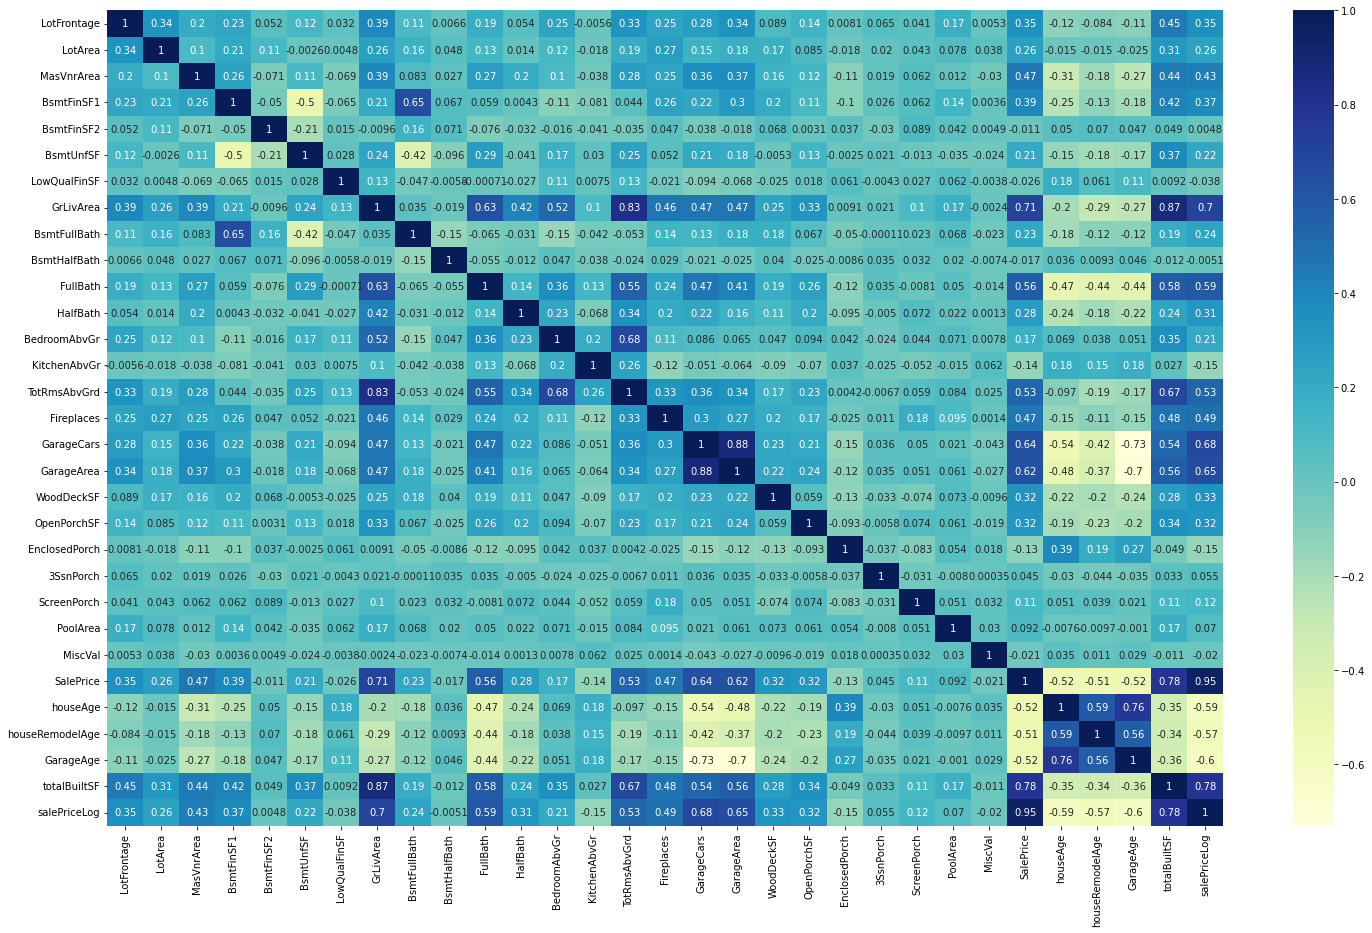

In [88]:
#construct a headmap to check the corelation in graph

plt.figure(figsize=(25,15))
sns.heatmap(house.corr(), annot=True, cmap='YlGnBu')
plt.show()

#### Inferences :

The Target variable salePriceLog has high direct corelation with SalePrice, totalBuiltSF, GrLivArea, GarageCars and GarageArea.
salePriceLog is indirectly propotional to houseAge, houseRemodelAge and GarageAge.

This is well explined with the logic of newer building has higher sale price.
Greater the total built area (totalBuiltSF), graded living area and higher Garage area and number leeds to higher salePrice.

We see quite a few liniarly corelated features/groups : (GarageCars, GarageArea), (TotRmsAbvGrd, GrLivArea) and (houseAge, houseRemodelAge, GarageAge )
 
We shall drop one among these pairs to remove some of the coorelated features.
We drop GarageArea since GarageCars can be better explained. 

we can use the translated variable salePriceLog as the target variable, in place of salePrice. we can safely drop it as well.

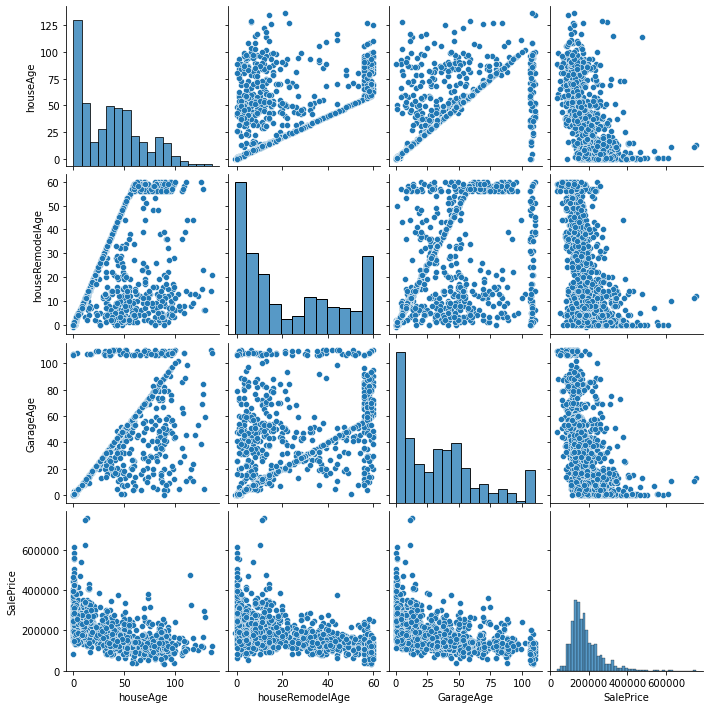

In [89]:

# let us deeply analise 'houseAge','houseRemodelAge' and 'GarageAge'
sns.pairplot(house, x_vars=['houseAge','houseRemodelAge','GarageAge', 'SalePrice'] ,
             y_vars=['houseAge','houseRemodelAge','GarageAge', 'SalePrice']  )
plt.show()

The Garages are mostly build while building the house, more or less, they too are as old as the house.
HouseRemodelAge is either houseAge when not remodelled, or would have a recent age when it is remodelled.
The domain knowledge tells that a house salePrice would be higher when it is remodeled than the value of the older counterpart.
So we can consider using HouseRemodelAge in our model and can safely drop 'houseAge' and 'GarageAge'.

In [90]:
# We drop 'houseAge', 'GarageAge', 'GarageArea', 'GrLivArea'

Cols_to_delete.extend([ 'houseAge', 'GarageAge', 'GarageArea'])
house = house.drop([ 'houseAge', 'GarageAge', 'GarageArea'], axis=1)


In [91]:
print(" Now the total features available is :", house.shape[1])

 Now the total features available is : 61


In [92]:
house.shape
len(cols_catogoric)

33

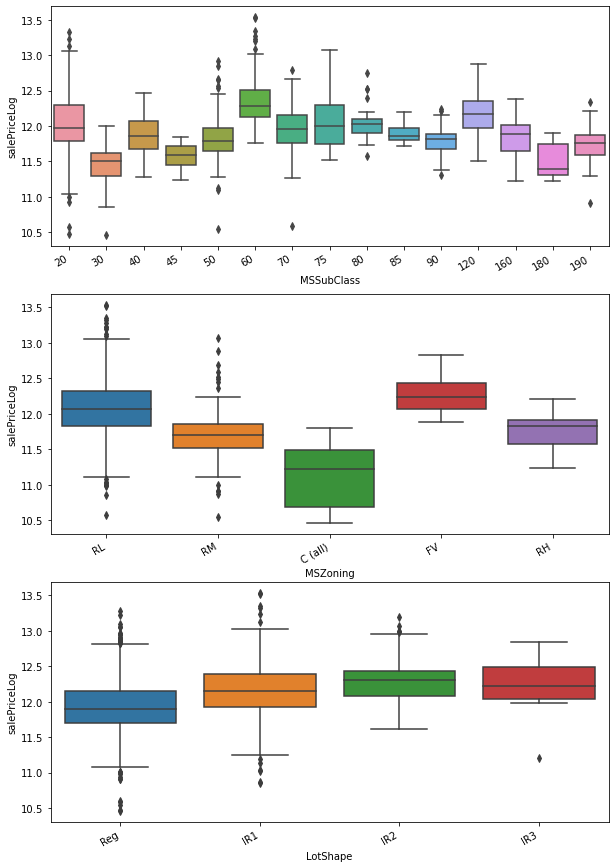

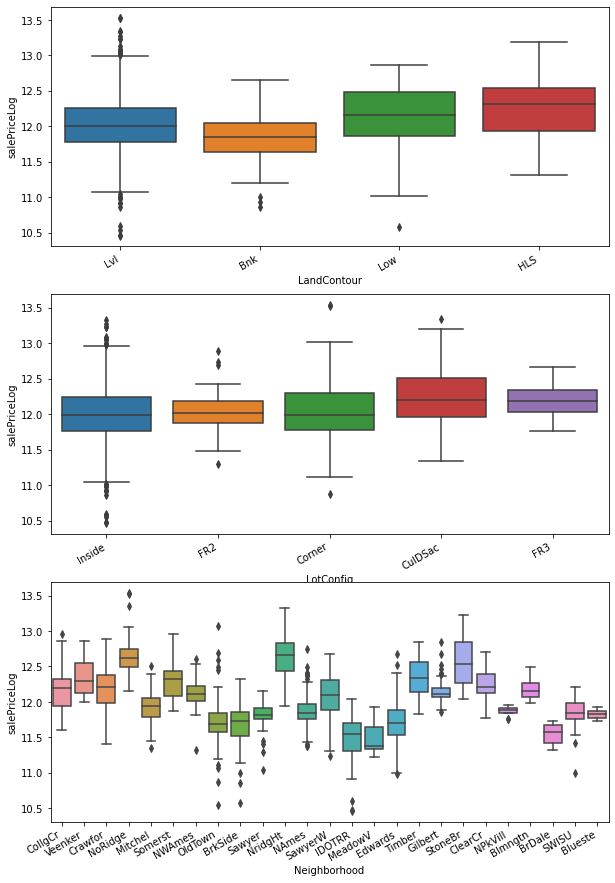

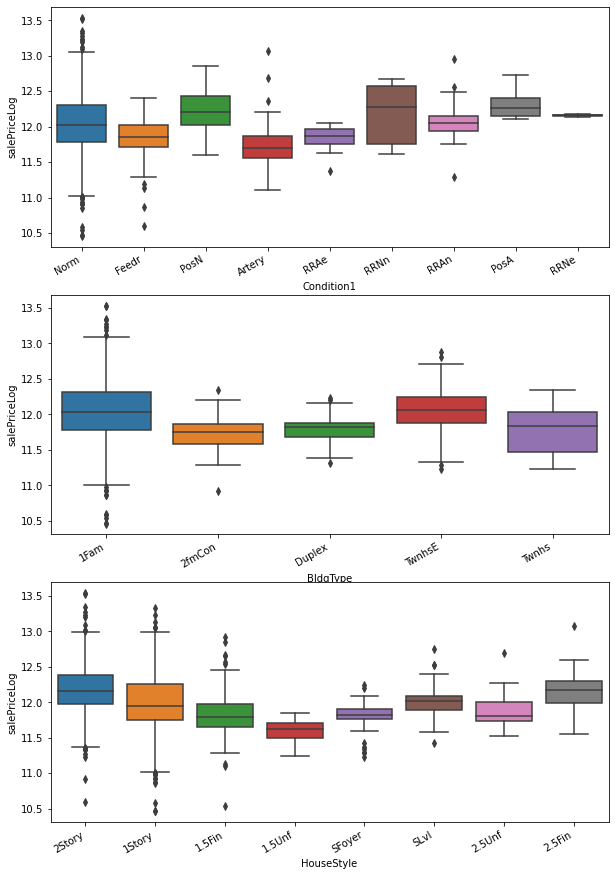

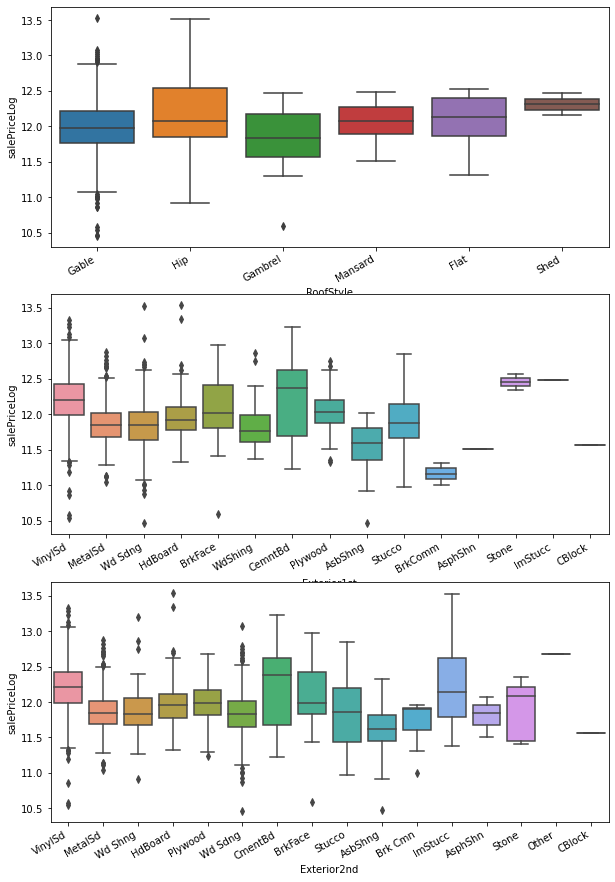

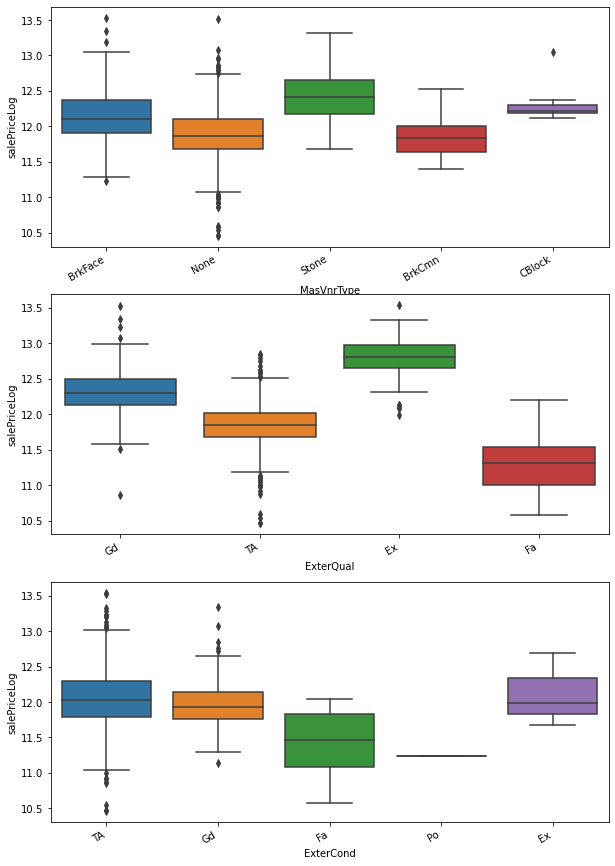

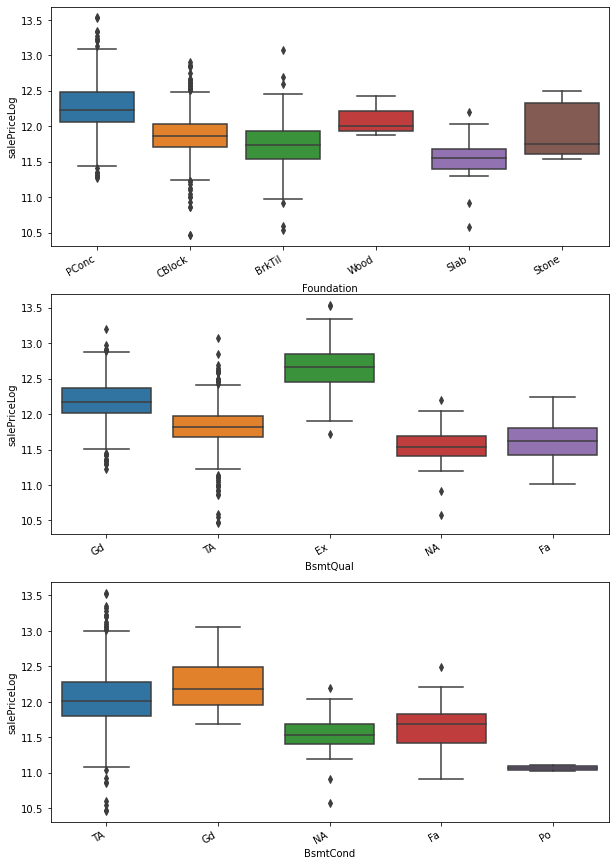

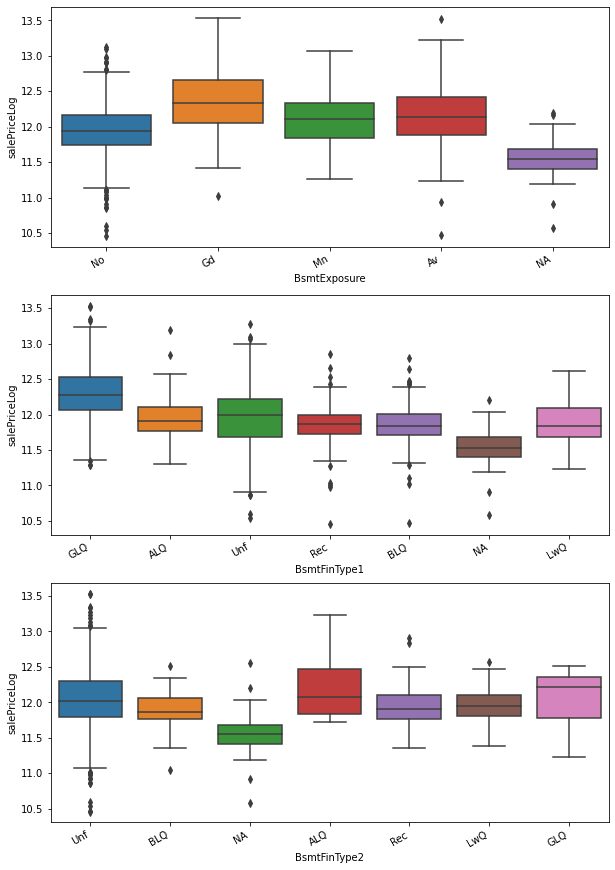

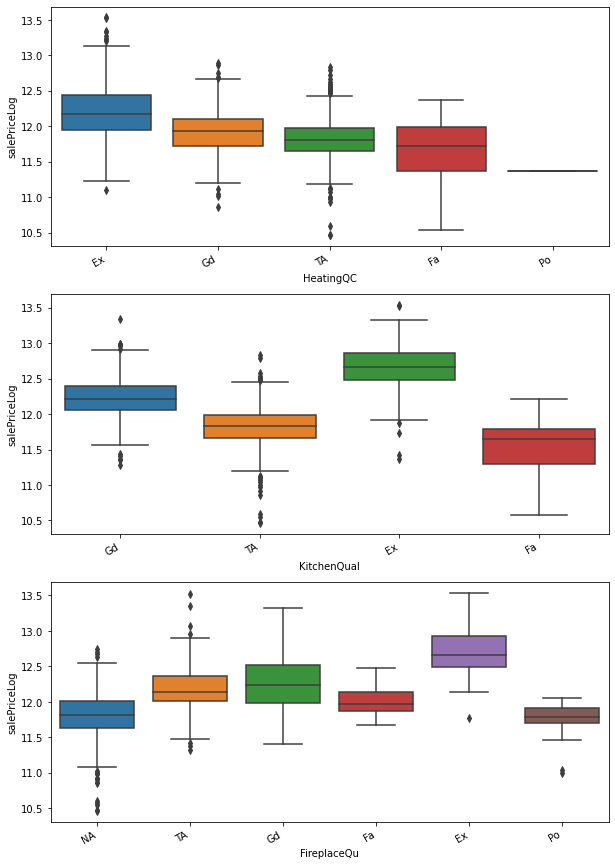

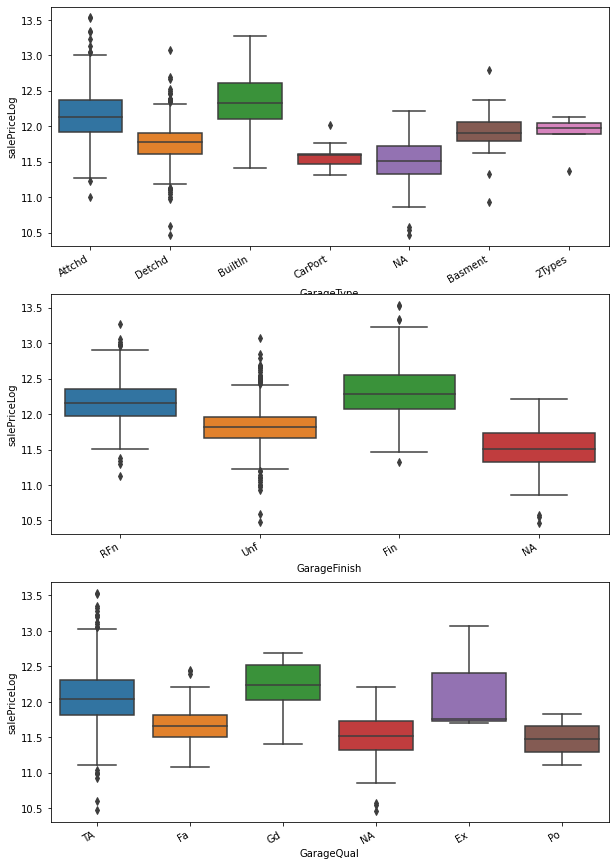

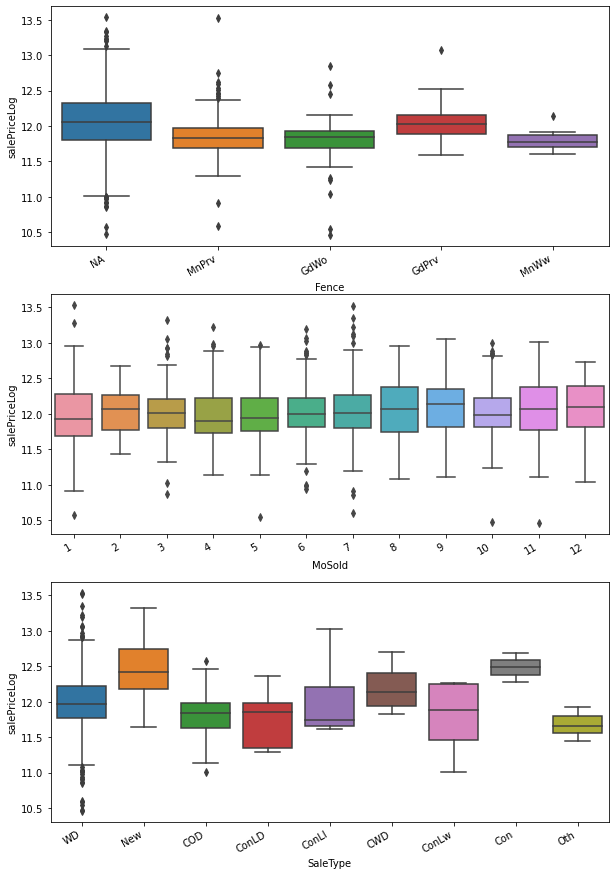

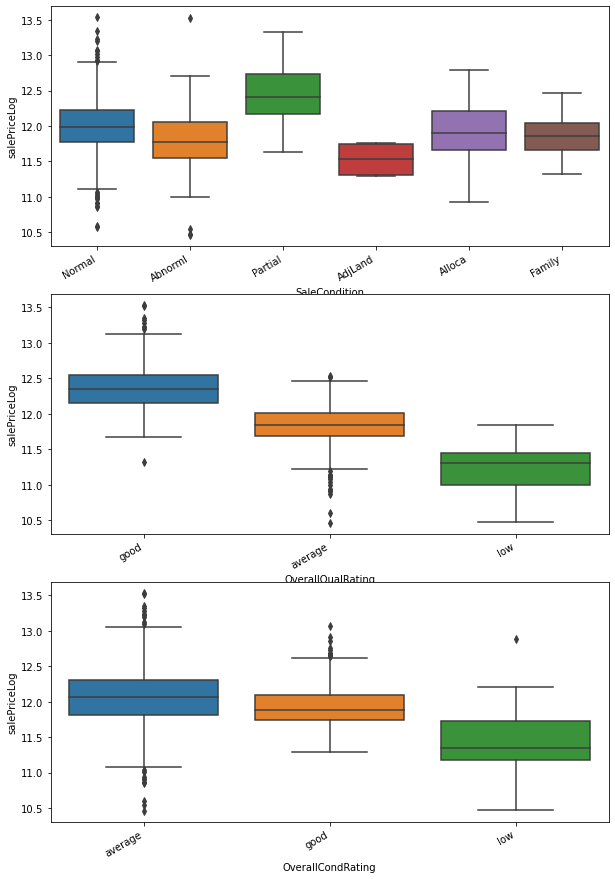

In [93]:
# let us visualise the 33 catogorical features with respect to the target variable 
# With salePrice running in range of tenthousands, we shall scall it through logtransformation, 


for i in range(11):
    plt.figure(figsize=(10,15))
    plt.subplot(3,1,1)           
    ax1=sns.boxplot(x=cols_catogoric[3*i], y='salePriceLog', data=house)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30, ha="right")
    plt.subplot(3,1,2)           
    ax2=sns.boxplot(x=cols_catogoric[3*i+1], y='salePriceLog', data=house)
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=30, ha="right")
    plt.subplot(3,1,3)           
    ax3=sns.boxplot(x=cols_catogoric[3*i+2], y='salePriceLog', data=house)
    ax3.set_xticklabels(ax3.get_xticklabels(), rotation=30, ha="right")
    plt.show()
    



#### Inference:
. (60) of MSSubClass 2-STORY 1946 & NEWER fetches the highest SalePrice, followed by (20) 1-STORY 1946 & NEWER ALL STYLES

. The Commercial zone had the cheapest housing salePrice (salePriceLog)

. NridgHt and StoneBr neighbourhood are the most costliest place for a house

. Single-family Detached type building is the most saught for, having high salePrice

. 2Story and 2.5Fin hausing style is fetch good salePrice

. CemntBd exteriors are good to have.

. Stone and  PCon (Poured Contrete)  Foundations are more preffered

. new Home just constructed and sold go for good salePrice

. OverallQualRating of good (10,9,8) of rating the overall material and finish of the house and about average OverallCondition    of the house is looked for a good salePrice.


### Data Preparation
We shall create dummy variables for important categorical variable

In [94]:
# one hot encoding, we shall create dummy variables for the catogorical columns
# eanch catogorical variable with n distinct value will provide n-1 column
dummies = pd.get_dummies(house[cols_catogoric], drop_first=True)

In [95]:
print(cols_catogoric)
print(len(cols_catogoric))

Index(['MSSubClass', 'MSZoning', 'LotShape', 'LandContour', 'LotConfig',
       'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'Fence', 'MoSold', 'SaleType',
       'SaleCondition', 'OverallQualRating', 'OverallCondRating'],
      dtype='object')
33


In [96]:
print(dummies.shape)
print(house.shape)

(1460, 203)
(1460, 61)


In [97]:
# Let us now concat the dummie table to house data frame and create a new dataframe housing
housing = pd.concat([dummies, house ] , axis=1)
print(housing.shape)

(1460, 264)


In [98]:
# Now we delete the source catogarical columns from housing data frame as part of one hot encoding
housing = housing.drop(cols_catogoric, axis=1)
print(housing.shape)

(1460, 231)


In [99]:
housing.describe()

MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  \
count    1460.000000    1460.000000    1460.000000    1460.000000   
mean        0.047260       0.002740       0.008219       0.098630   
std         0.212268       0.052289       0.090317       0.298267   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

       MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  \
count    1460.000000    1460.000000    1460.000000    1460.000000   
mean        0.204795       0.041096       0.010959       0.039726   
std         0.403690       0.198580       0.104145       0.195382   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

       MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  \
count    1460.000000    1460.000000     1460.000000     1460.000000   
mean        0.013699       0.035616        0.059589        0.043151   
std         0.116277       0.185395        0.236805        0.203266   
min         0.000000       0.000000        0.000000        0.000000   
25%         0.000000       0.000000        0.000000        0.000000   
50%         0.000000       0.000000        0.000000        0.000000   
75%         0.000000       0.000000        0.000000        0.000000   
max         1.000000       1.000000        1.000000        1.000000   

       MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
count     1460.000000     1460.000000  1460.000000  1460.000000  1460.000000   
mean         0.006849        0.020548     0.044521     0.010959     0.788356   
std          0.082505        0.141914     0.206319     0.104145     0.408614   
min          0.000000        0.000000     0.000000     0.000000     0.000000   
25%          0.000000        0.000000     0.000000     0.000000     1.000000   
50%          0.000000        0.000000     0.000000     0.000000     1.000000   
75%          0.000000        0.000000     0.000000     0.000000     1.000000   
max          1.000000        1.000000     1.000000     1.000000     1.000000   

       MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  \
count  1460.000000   1460.000000   1460.000000   1460.000000      1460.000000   
mean      0.149315      0.028082      0.006849      0.633562         0.034247   
std       0.356521      0.165264      0.082505      0.481996         0.181924   
min       0.000000      0.000000      0.000000      0.000000         0.000000   
25%       0.000000      0.000000      0.000000      0.000000         0.000000   
50%       0.000000      0.000000      0.000000      1.000000         0.000000   
75%       0.000000      0.000000      0.000000      1.000000         0.000000   
max       1.000000      1.000000      1.000000      1.000000         1.000000   

       LandContour_Low  LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  \
count      1460.000000      1460.000000        1460.000000    1460.000000   
mean          0.024658         0.897945           0.064384       0.032192   
std           0.155132         0.302824           0.245519       0.176570   
min           0.000000         0.000000           0.000000       0.000000   
25%           0.000000         1.000000           0.000000       0.000000   
50%           0.000000         1.000000           0.000000       0.000000   
75%           0.000000         1.000000           0.000000       0.000000   
max           1.000000         1.000000           1.0000

#### Here is the data converted to a clean format suitable for analysis with 230 features.
DataFrame : housing  with shape :  (1460 rows, 230 columns)
Target variables: salePrice and salePriceLog (log transformed salePrice) so that we can use either as per our need

### Splitting the Data into Training and Testing Sets
 Split data in to training and test data using train_test_split

In [100]:
# Import train_test_split

from sklearn.model_selection import train_test_split


In [101]:
# let us use salePriceLog as the target variable. We can drop SalePrice
housing = housing.drop('SalePrice', axis=1 )
housing.shape

(1460, 230)

In [102]:
# We specify random_state = 80 so that train and test data always have the same rows, respectively with train 70% and test 30%
df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 80)

In [103]:
# Shape of df_train, df_test
print("Shape of df_train = ", df_train.shape ," df_test = ", df_test.shape)

Shape of df_train =  (1021, 230)  df_test =  (438, 230)


### Rescaling the Features
normalise using MinMaxScaler

In [104]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

In [105]:
#Create an object of MinMaxScaler
scaler = MinMaxScaler()

We shall scale all the colums, if at all the colums in binary (0,1) it will remain same. <br>
for other columns with different values, it scales down to a value between 0 and 1. <br>
Out layers (if any) will also be treated with this scaling

In [106]:
# Scale fit and transform the df_train data
all_cols = df_train.columns

df_train[all_cols] = scaler.fit_transform(df_train[all_cols])

In [107]:
# Now we transform the df_test data using the scale of df_train data

df_test[all_cols] = scaler.transform(df_test[all_cols])

In [108]:
df_test.shape

(438, 230)

In [109]:
# df_train after scaling.
df_train.describe()

MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  \
count    1021.000000    1021.000000    1021.000000    1021.000000   
mean        0.044074       0.002938       0.008815       0.094025   
std         0.205361       0.054153       0.093519       0.292007   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

       MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  \
count    1021.000000    1021.000000    1021.000000    1021.000000   
mean        0.200784       0.039177       0.009794       0.037218   
std         0.400783       0.194112       0.098529       0.189389   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

       MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  \
count    1021.000000    1021.000000     1021.000000     1021.000000   
mean        0.011753       0.040157        0.068560        0.049951   
std         0.107826       0.196423        0.252829        0.217951   
min         0.000000       0.000000        0.000000        0.000000   
25%         0.000000       0.000000        0.000000        0.000000   
50%         0.000000       0.000000        0.000000        0.000000   
75%         0.000000       0.000000        0.000000        0.000000   
max         1.000000       1.000000        1.000000        1.000000   

       MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
count     1021.000000     1021.000000  1021.000000  1021.000000  1021.000000   
mean         0.009794        0.020568     0.047992     0.006856     0.779628   
std          0.098529        0.142003     0.213854     0.082557     0.414701   
min          0.000000        0.000000     0.000000     0.000000     0.000000   
25%          0.000000        0.000000     0.000000     0.000000     1.000000   
50%          0.000000        0.000000     0.000000     0.000000     1.000000   
75%          0.000000        0.000000     0.000000     0.000000     1.000000   
max          1.000000        1.000000     1.000000     1.000000     1.000000   

       MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  \
count  1021.000000   1021.000000   1021.000000   1021.000000      1021.000000   
mean      0.158668      0.029383      0.006856      0.632713         0.038198   
std       0.365545      0.168960      0.082557      0.482302         0.191768   
min       0.000000      0.000000      0.000000      0.000000         0.000000   
25%       0.000000      0.000000      0.000000      0.000000         0.000000   
50%       0.000000      0.000000      0.000000      1.000000         0.000000   
75%       0.000000      0.000000      0.000000      1.000000         0.000000   
max       1.000000      1.000000      1.000000      1.000000         1.000000   

       LandContour_Low  LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  \
count      1021.000000      1021.000000        1021.000000    1021.000000   
mean          0.018609         0.903036           0.069540       0.037218   
std           0.135207         0.296053           0.254494       0.189389   
min           0.000000         0.000000           0.000000       0.000000   
25%           0.000000         1.000000           0.000000       0.000000   
50%           0.000000         1.000000           0.000000       0.000000   
75%           0.000000         1.000000           0.000000       0.000000   
max           1.000000         1.000000           1.0000

#### Building a linear model

As we have 230 features, We will be using the **RFE and LinearRegression function from SciKit Learn** for initial feature selection. 
later shall be continuing with `statsmodels` and Fit a regression line through the training data. 
In `statsmodels`, we need to explicitly fit a constant using `sm.add_constant(X)` or else regression line will passing through the origin, by default.

In [110]:
#Let us use the log translated salePriceLog for our model fitting
y_train_lr = df_train.pop('salePriceLog')
X_train_lr = df_train


In [111]:
# let us check shape of data
print("Shape of X_train_lr=", X_train_lr.shape ," y_train_lr", y_train_lr.shape)

Shape of X_train_lr= (1021, 229)  y_train_lr (1021,)


In [112]:
# Running RFE with the output number of the variable equal to 60
lmr = LinearRegression()
lmr.fit(X_train_lr, y_train_lr)

rfe = RFE(lmr, 60)             # running RFE
rfe = rfe.fit(X_train_lr, y_train_lr)

In [113]:
list(zip(X_train_lr.columns, rfe.support_,rfe.ranking_))

[('MSSubClass_30', True, 1),
 ('MSSubClass_40', False, 12),
 ('MSSubClass_45', True, 1),
 ('MSSubClass_50', False, 92),
 ('MSSubClass_60', False, 44),
 ('MSSubClass_70', False, 116),
 ('MSSubClass_75', False, 114),
 ('MSSubClass_80', False, 95),
 ('MSSubClass_85', False, 169),
 ('MSSubClass_90', True, 1),
 ('MSSubClass_120', False, 86),
 ('MSSubClass_160', False, 42),
 ('MSSubClass_180', False, 85),
 ('MSSubClass_190', False, 67),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', False, 145),
 ('LotShape_IR3', True, 1),
 ('LotShape_Reg', False, 148),
 ('LandContour_HLS', False, 28),
 ('LandContour_Low', False, 34),
 ('LandContour_Lvl', False, 29),
 ('LotConfig_CulDSac', False, 49),
 ('LotConfig_FR2', False, 84),
 ('LotConfig_FR3', False, 65),
 ('LotConfig_Inside', False, 137),
 ('Neighborhood_Blueste', False, 111),
 ('Neighborhood_BrDale', False, 118),
 ('Neighborhood_BrkSide', False, 58),
 ('Neighborhood_Clear

In [114]:
# Here are the RFE supported columns
rfe_sup_col = X_train_lr.columns[rfe.support_]
print(rfe_sup_col)

Index(['MSSubClass_30', 'MSSubClass_45', 'MSSubClass_90', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR3',
       'Neighborhood_Crawfor', 'Neighborhood_MeadowV', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'BldgType_Duplex', 'HouseStyle_1.5Unf', 'HouseStyle_2.5Fin',
       'RoofStyle_Shed', 'Exterior1st_BrkComm', 'Exterior1st_CBlock',
       'Exterior1st_Stucco', 'Exterior2nd_CBlock', 'Exterior2nd_Other',
       'Exterior2nd_Stucco', 'ExterCond_Fa', 'ExterCond_Gd', 'ExterCond_Po',
       'ExterCond_TA', 'Foundation_Stone', 'BsmtQual_NA', 'BsmtCond_NA',
       'BsmtFinType1_NA', 'BsmtFinType2_NA', 'HeatingQC_Po',
       'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn',
       'GarageType_Detchd', 'GarageType_NA', 'GarageFinish_NA',
       'GarageQual_Fa', 'GarageQual_Gd', 'GarageQual_NA', 'GarageQual_Po',
       'GarageQual_TA', 'SaleType_CWD', 'SaleType_Con',
       'Overa

In [115]:
# Creating X_train_rfe dataframe with RFE selected variables
X_train_rfe = X_train_lr[rfe_sup_col]
X_train_rfe

MSSubClass_30  MSSubClass_45  MSSubClass_90  MSZoning_FV  MSZoning_RH  \
183             0.0            0.0            0.0          0.0          0.0   
506             0.0            0.0            0.0          0.0          0.0   
87              0.0            0.0            0.0          1.0          0.0   
932             0.0            0.0            0.0          0.0          0.0   
17              0.0            0.0            1.0          0.0          0.0   
790             0.0            0.0            0.0          0.0          0.0   
1016            0.0            0.0            0.0          0.0          0.0   
447             0.0            0.0            0.0          0.0          0.0   
246             0.0            0.0            0.0          0.0          0.0   
829             0.0            0.0            0.0          1.0          0.0   
1014            0.0            0.0            0.0          0.0          0.0   
1426            0.0            0.0            0.0          0.0          0.0   
147             0.0            0.0            0.0          0.0          0.0   
1236            0.0            0.0            0.0          0.0          0.0   
104             0.0            0.0            0.0          0.0          0.0   
1369            0.0            0.0            0.0          0.0          0.0   
670             0.0            0.0            0.0          0.0          0.0   
472             0.0            0.0            0.0          0.0          0.0   
835             0.0            0.0            0.0          0.0          0.0   
1102            0.0            0.0            0.0          0.0          0.0   
227             0.0            0.0            0.0          0.0          0.0   
771             0.0            0.0            0.0          0.0          0.0   
218             0.0            0.0            0.0          0.0          0.0   
1454            0.0            0.0            0.0          1.0          0.0   
1139            1.0            0.0            0.0          0.0          0.0   
458             0.0            0.0            0.0          0.0          0.0   
23              0.0            0.0            0.0          0.0          0.0   
789             0.0            0.0            0.0          0.0          0.0   
1112            0.0            0.0            0.0          0.0          0.0   
1372            0.0            0.0            0.0          0.0          0.0   
1051            0.0            0.0            0.0          0.0          0.0   
804             0.0            0.0            0.0          0.0          0.0   
485             0.0            0.0            0.0          0.0          0.0   
1050            0.0            0.0            0.0          0.0          0.0   
1204            0.0            0.0            0.0          0.0          0.0   
1356            0.0            0.0            0.0          0.0          0.0   
1209            0.0            0.0            0.0          0.0          0.0   
373             0.0            0.0            0.0          0.0          0.0   
438             1.0            0.0            0.0          0.0          0.0   
179             1.0            0.0            0.0          0.0          0.0   
196             0.0            0.0            0.0          0.0          0.0   
609             0.0            0.0            0.0          0.0          0.0   
1173            0.0            0.0            0.0          0.0          0.0   
553             0.0            0.0            0.0          0.0          0.0   
1439            0.0            0.0            0.0          0.0          0.0   
1309            0.0            0.0            0.0          0.0          0.0   
823             0.0            0.0            0.0          0.0          0.0   
188             0.0            0.0            1.0          0.0          0.0   
950             0.0            0.0            0.0          0.0          0.0   
1394            0.0            0.0            0.0       

### Building first model using statsmodel, for the detailed statistics

In [116]:
# import statsmodel and  Adding a constant variable to X_train_rfe
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [117]:
# Running the linear model , fit it for training data
lm = sm.OLS(y_train_lr, X_train_rfe).fit()

In [118]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:           salePriceLog   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     128.2
Date:                Wed, 16 Feb 2022   Prob (F-statistic):               0.00
Time:                        20:50:29   Log-Likelihood:                 1643.0
No. Observations:                1021   AIC:                            -3188.
Df Residuals:                     972   BIC:                            -2946.
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.32

In [119]:
# Let us predict y train value
y_train_pred = lm.predict(X_train_rfe)

<AxesSubplot:ylabel='Density'>

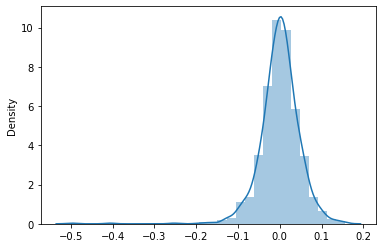

In [120]:
# Let us check the error term, if they are normally distributed or not
residue_lm = y_train_lr - y_train_pred
sns.distplot(residue_lm , bins = 30)

In [121]:
#### though the mean is 0, the curve looks little bit normal, but some data distributed more in left side, Let us try using this model on test data

In [122]:
# Let us predict on test data
y_test_lm = df_test.pop('salePriceLog')
X_test_lm = df_test

y_test_lr = df_test.pop('salePriceLog')
X_test_lr = df_test

# Adding a constant variable 
X_test_lm2 = sm.add_constant(X_test_lm)

# Creating X_test_new dataframe with only the variable available on X_test
X_test_rfe = X_test_lm2[X_train_rfe.columns]

In [123]:
# Making predictions
y_test_pred = lm.predict(X_test_rfe)

In [124]:
# let us find metrix


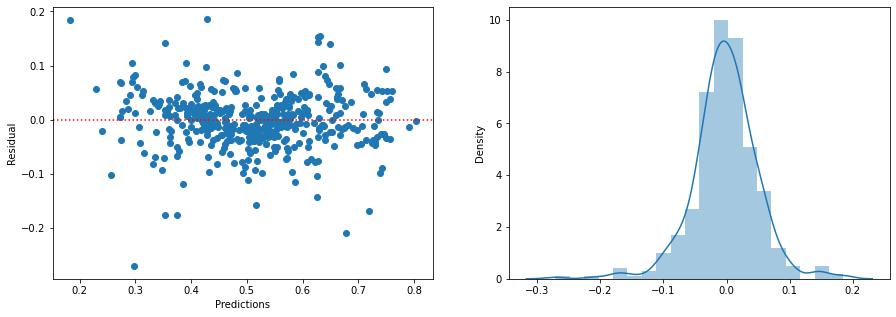

In [125]:
res_lm = y_test_lm - y_test_pred
plt.figure(figsize=(15,5))
plt.subplot(1,2,1) 
plt.scatter( y_test_pred , res_lm)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.subplot(1,2,2)
sns.distplot(res_lm , bins = 20)
plt.show()


#### The residual error seems to be fairly normal with mean at 0.
#### But the scatter plot shows the variance is not uniformally distributed. definitely we would need to go for a better model for sure






### Ridge Regression
As we have quite a lot columns around 230, we would need a way regularise the model as well. 
We will next try using Ridge regression to build the model 

In [181]:
# Applying Ridge Regression with varying the hyperparameter 'alpha'(Lambda)

params = {'alpha': [ 0.0001, 0.0002, 0.001, 0.01, 0.1, 0.2, 0.3,0.35, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 
                    2.0, 3.0, 4.0,5.0, 6.0,7.0, 8.0, 9.0, 10.0, 25, 50, 100] }

ridge = Ridge()

# We go for cross validation as it yealds the best result when we have limited data
folds = 10

ridge_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1) 

# ridge_cv.fit(X_train_rfe, y_train_lr)

ridge_cv.fit(X_train_lr, y_train_lr)

Fitting 10 folds for each of 27 candidates, totalling 270 fits


GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.0002, 0.001, 0.01, 0.1, 0.2, 0.3,
                                   0.35, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0,
                                   3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 25,
                                   50, 100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [182]:
# Printing the best alpha value 
print(ridge_cv.best_params_)

{'alpha': 4.0}


In [190]:
#Fitting Ridge model for alpha = 0.001 and printing coefficients which have been penalised
alpha = 4.0

ridge = Ridge(alpha = alpha)
# ridge.fit(X_train_rfe, y_train_lr)

ridge.fit(X_train_lr, y_train_lr)
print( ridge.coef_ )

[-0.0391139   0.00336713 -0.01179145  0.00428316 -0.00473604  0.01192541
  0.0153265  -0.01061738 -0.00401111 -0.0002385  -0.00754829 -0.02331961
 -0.0152615  -0.00857867  0.02924927  0.0215982   0.03903394  0.02501729
  0.01273161 -0.02065832  0.00214945  0.01533943  0.00383329  0.0183581
  0.0175722  -0.01880469 -0.00957011 -0.00723761 -0.00200739 -0.00235949
 -0.00076833  0.01786234 -0.00463507  0.03426973 -0.03043789 -0.00868429
 -0.04413874 -0.03575485 -0.0111929  -0.01061621  0.00392523 -0.00700567
  0.04463397  0.03806426 -0.01805312 -0.01417369 -0.01973057  0.00437951
  0.03531644  0.05121139  0.00378201  0.00666607 -0.01027621  0.01480294
  0.00630238 -0.00517955 -0.01215969 -0.00337996 -0.00564169 -0.00359692
 -0.01168807 -0.0002385  -0.02197145 -0.02073177  0.00460815 -0.00093199
 -0.00508978  0.00020899 -0.0057087  -0.01093754  0.00149859 -0.00526258
 -0.00912951  0.00292264  0.00723057  0.01235926  0.0007887   0.
  0.02745618  0.          0.00072073  0.00055551 -0.00207087

In [191]:
# let us use the model to predict on train and test data and check the matrix

y_pred_train_ridge = ridge.predict(X_train_lr)
y_pred_test_ridge = ridge.predict(X_test_lm)

In [192]:
# y_train_lr  y_test_lm

rg_metric=[]
r2_train_ridge = r2_score(y_train_lr, y_pred_train_ridge)
print('R2(train) =',r2_train_ridge)
rg_metric.append(r2_train_ridge)

r2_test_ridge = r2_score(y_test_lm, y_pred_test_ridge)
print('R2(test) =',r2_test_ridge)
rg_metric.append(r2_test_ridge)



rss1_ridge = np.sum(np.square(y_train_lr - y_pred_train_ridge))
print('RSS(train) =',rss1_ridge)
rg_metric.append(rss1_ridge)
rss2_ridge = np.sum(np.square(y_test_lm - y_pred_test_ridge))
print('RSS(test) =',rss2_ridge)
rg_metric.append(rss2_ridge)


mse_train_ridge = mean_squared_error(y_train_lr, y_pred_train_ridge)
print('MSE(train) =',mse_train_ridge)
rg_metric.append(mse_train_ridge)
mse_test_ridge = mean_squared_error(y_test_lm, y_pred_test_ridge)
print('MSE(test) =',mse_test_ridge)
rg_metric.append(mse_test_ridge)


R2(train) = 0.9127482735494342
R2(test) = 0.880879786766605
RSS(train) = 1.5305201523306358
RSS(test) = 0.843844693474237
MSE(train) = 0.0014990403059065972
MSE(test) = 0.0019265860581603584


#### The metrics is decently fine with R squire train 91.27 % and r squre test 88.09%
#### Residue sum of squres are really attractive and quite less, 1.53 for training and .84 for test
#### MSE Train and test are also quite less 0.0014 and 0.0019

In [193]:
# Let us display it in df
ridge_df = pd.DataFrame({'Features':X_train_lr.columns, 'Coefficient':ridge.coef_.round(4)})

ridge_df.reset_index(drop=True, inplace=True)

ridge_df.sort_values("Coefficient", axis = 0, ascending = False, inplace = True, na_position ='first')

ridge_df.head(15)

Features  Coefficient
210             GrLivArea       0.0895
219            GarageCars       0.0764
213              FullBath       0.0676
217          TotRmsAbvGrd       0.0577
228          totalBuiltSF       0.0523
49   Neighborhood_StoneBr       0.0512
224           ScreenPorch       0.0495
42   Neighborhood_NoRidge       0.0446
16            MSZoning_RL       0.0390
43   Neighborhood_NridgHt       0.0381
48   Neighborhood_Somerst       0.0353
33   Neighborhood_Crawfor       0.0343
214              HalfBath       0.0321
14            MSZoning_FV       0.0292
78    Exterior1st_BrkFace       0.0275

In [194]:
# display the mean scores

ridge_cv_results = pd.DataFrame(ridge_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=5000]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
17         4.0         -0.026841        -0.032661                1
18         5.0         -0.027135        -0.032664                2
16         3.0         -0.026504        -0.032677                3
19         6.0         -0.027404        -0.032685                4
20         7.0         -0.027657        -0.032718                5
21         8.0         -0.027902        -0.032778                6
15         2.0         -0.026104        -0.032779                7
22         9.0         -0.028136        -0.032862                8
23        10.0         -0.028362        -0.032951                9
14         1.0         -0.025565        -0.033090               10
13         0.9         -0.025500        -0.033147               11
12         0.8         -0.025433        -0.033211               12
11         0.7         -0.025364        -0.033289               13
10         0.6         -0.025295        -0.033389               14
9          0.5         -0.025225        -0.033511               15
8          0.4         -0.025154        -0.033671               16
7         0.35         -0.025117        -0.033765               17
6          0.3         -0.025079        -0.033869               18
5          0.2         -0.025007        -0.034146               19
4          0.1         -0.024941        -0.034606               20
24          25         -0.031192        -0.034866               21
3         0.01         -0.024904        -0.035464               22
2        0.001         -0.024904        -0.035608               23
1       0.0002         -0.024904        -0.035622               24
0       0.0001         -0.024904        -0.035623               25
25          50         -0.034381        -0.037360               26
26         100         -0.038399        -0.040734               27

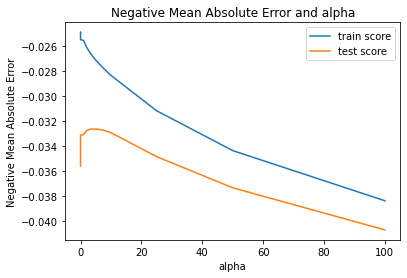

In [195]:
# plotting mean test and train scoes with alpha 

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

# plotting

plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.title("Negative Mean Absolute Error and alpha")
plt.ylabel('Negative Mean Absolute Error')
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

#### We see that the mean absolute error decrease with growing alpha. For higher alpha model tends to underfit

### Lasso Regression
This also helps regularization

In [196]:
lasso = Lasso()
# List of alpha to tune
params = {'alpha': [ 0.0001, 0.0002, 0.001, 0.002, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 
                    2.0, 3.0, 4.0,5.0, 6.0,7.0, 8.0, 9.0, 10.0, 25, 50, 100] }
folds=10
# cross validation
lasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_cv.fit(X_train_lr, y_train_lr) 
## lasso_cv.fit(X_train_rfe, y_train_lr)


Fitting 10 folds for each of 26 candidates, totalling 260 fits


GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.001, 0.002, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 25, 50,
                                   100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [197]:
# Printing the best hyperparameter
print( lasso_cv.best_params_)

{'alpha': 0.0002}


#### Even for lasso the best alpha seems to be 0.0001  like that of Ridge

In [198]:
#Fitting lasso model for alpha = 0.001 and printing coefficients which have been penalised

alpha =0.0002

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_lr, y_train_lr)

Lasso(alpha=0.0002)

In [167]:
lasso.coef_

array([-3.98745971e-02,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -5.29132851e-03,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.80417016e-02,  0.00000000e+00,  8.69721347e-03, -1.23520397e-02,
        0.00000000e+00,  8.13823675e-03,  0.00000000e+00,  1.56823614e-02,
        1.77928201e-02, -8.52848419e-03, -0.00000000e+00, -3.60044898e-03,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.71145650e-02,
        0.00000000e+00,  3.64136076e-02, -2.24855694e-02, -7.61321460e-04,
       -3.74300033e-02, -3.36160599e-02, -0.00000000e+00, -4.17572036e-03,
        0.00000000e+00, -0.00000000e+00,  3.91888887e-02,  4.49580030e-02,
       -1.10534132e-02, -5.31633884e-04, -1.40470558e-02,  2.19800971e-03,
        4.24885309e-02,  5.12031372e-02,  1.63234843e-03,  0.00000000e+00,
       -4.66655827e-03,  

In [138]:
#### Lasso has reduced the fetures by applying 0 to its coefficients

In [199]:
# Lets predict using lasso and calculate some metrics

y_pred_train_lasso = lasso.predict(X_train_lr)
y_pred_test_lasso = lasso.predict(X_test_lm)


# y_train_lr  y_test_lm
lso_model=[]
r2_train_lasso = r2_score(y_train_lr, y_pred_train_lasso)
print('R2(train) =',r2_train_lasso)
lso_model.append(r2_train_lasso)
r2_test_lasso = r2_score(y_test_lm, y_pred_test_lasso)
print('R2(test) =',r2_test_lasso)
lso_model.append(r2_test_lasso)


rss1_lasso = np.sum(np.square(y_train_lr - y_pred_train_lasso))
print('RSS(train) =',rss1_lasso)
lso_model.append(rss1_lasso)
rss2_lasso = np.sum(np.square(y_test_lm - y_pred_test_lasso))
print('RSS(test) =',rss2_lasso)
lso_model.append(rss2_lasso)


mse_train_lesso = mean_squared_error(y_train_lr, y_pred_train_lasso)
print('MSE(train) =',mse_train_lesso)
lso_model.append(mse_train_lesso)
mse_test_lesso = mean_squared_error(y_test_lm, y_pred_test_lasso)
print('MSE(test) =',mse_test_lesso)
lso_model.append(mse_test_lesso)

R2(train) = 0.9051833377213988
R2(test) = 0.8854629613321827
RSS(train) = 1.6632199533191714
RSS(test) = 0.8113775963170891
MSE(train) = 0.0016290107280305304
MSE(test) = 0.0018524602655641304


In [169]:
lasso_cv_results = pd.DataFrame(lasso_cv.cv_results_)
lasso_cv_results = lasso_cv_results[lasso_cv_results.param_alpha <=500]
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
1       0.0002         -0.027392        -0.031614                1
0       0.0001         -0.026255        -0.031893                2
2        0.001         -0.036377        -0.038754                3
3        0.002         -0.043021        -0.044767                4
23          25         -0.100682        -0.100798                5
22        10.0         -0.100682        -0.100798                5
21         9.0         -0.100682        -0.100798                5
20         8.0         -0.100682        -0.100798                5
19         7.0         -0.100682        -0.100798                5
18         6.0         -0.100682        -0.100798                5
17         5.0         -0.100682        -0.100798                5
16         4.0         -0.100682        -0.100798                5
15         3.0         -0.100682        -0.100798                5
14         2.0         -0.100682        -0.100798                5
12         0.9         -0.100682        -0.100798                5
24          50         -0.100682        -0.100798                5
11         0.8         -0.100682        -0.100798                5
10         0.7         -0.100682        -0.100798                5
9          0.6         -0.100682        -0.100798                5
8          0.5         -0.100682        -0.100798                5
7          0.4         -0.100682        -0.100798                5
6          0.3         -0.100682        -0.100798                5
5          0.2         -0.100682        -0.100798                5
4          0.1         -0.100682        -0.100798                5
13         1.0         -0.100682        -0.100798                5
25         100         -0.100682        -0.100798                5

In [170]:
lasso_cv_results.shape

(26, 31)

In [171]:
lasso_cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.022472      0.004817         0.002600        0.000663      0.0001   
1        0.012008      0.001116         0.002650        0.000895      0.0002   
2        0.011272      0.002555         0.002951        0.001011       0.001   
3        0.009450      0.002573         0.002800        0.001250       0.002   
4        0.005716      0.000810         0.002500        0.000671         0.1   
5        0.009846      0.003964         0.003812        0.001873         0.2   
6        0.008641      0.003251         0.003450        0.001779         0.3   
7        0.007745      0.002505         0.002691        0.000695         0.4   
8        0.007297      0.001718         0.002326        0.000588         0.5   
9        0.006356      0.000735         0.002874        0.000725         0.6   
10       0.006558      0.001536         0.002131        0.000306         0.7   
11       0.005898      0.000839         0.002282        0.000435         0.8   
12       0.008594      0.003529         0.003160        0.001746         0.9   
13       0.008373      0.003447         0.003214        0.001509         1.0   
14       0.007816      0.002636         0.002944        0.001211         2.0   
15       0.006592      0.002874         0.002718        0.000778         3.0   
16       0.007512      0.003457         0.003747        0.001900         4.0   
17       0.010446      0.002735         0.004791        0.001782         5.0   
18       0.011102      0.003432         0.004207        0.001576         6.0   
19       0.007134      0.001924         0.002469        0.000429         7.0   
20       0.008459      0.002918         0.002990        0.001332         8.0   
21       0.007125      0.002813         0.002507        0.000933         9.0   
22       0.009060      0.003207         0.003774        0.001589        10.0   
23       0.009518      0.003495         0.004411        0.001434          25   
24       0.012944      0.002657         0.005654        0.001988          50   
25       0.010520      0.003471         0.004405        0.001811         100   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}          -0.031695          -0.029854   
1   {'alpha': 0.0002}          -0.030684          -0.030921   
2    {'alpha': 0.001}          -0.035808          -0.039179   
3    {'alpha': 0.002}          -0.041333          -0.045246   
4      {'alpha': 0.1}          -0.098988          -0.107031   
5      {'alpha': 0.2}          -0.098988          -0.107031   
6      {'alpha': 0.3}          -0.098988          -0.107031   
7      {'alpha': 0.4}          -0.098988          -0.107031   
8      {'alpha': 0.5}          -0.098988          -0.107031   
9      {'alpha': 0.6}          -0.098988          -0.107031   
10     {'alpha': 0.7}          -0.098988          -0.107031   
11     {'alpha': 0.8}          -0.098988          -0.107031   
12     {'alpha': 0.9}          -0.098988          -0.107031   
13     {'alpha': 1.0}          -0.098988          -0.107031   
14     {'alpha': 2.0}          -0.098988          -0.107031   
15     {'alpha': 3.0}          -0.098988          -0.107031   
16     {'alpha': 4.0}          -0.098988          -0.107031   
17     {'alpha': 5.0}          -0.098988          -0.107031   
18     {'alpha': 6.0}          -0.098988          -0.107031   
19     {'alpha': 7.0}          -0.098988          -0.107031   
20     {'alpha': 8.0}          -0.098988          -0.107031   
21     {'alpha': 9.0}          -0.098988          -0.107031   
22    {'alpha': 10.0}          -0.098988          -0.107031   
23      {'alpha': 25}          -0.098988          -0.107031   
24      {'alpha': 50}          -0.098988          -0.107031   
25     {'alpha': 100}          -0.098988          -0.107031   

    split2_test_score  split3_test_score  split4_test_score  \
0           -0.035704          -0.031076          -0.033235   
1           -0.

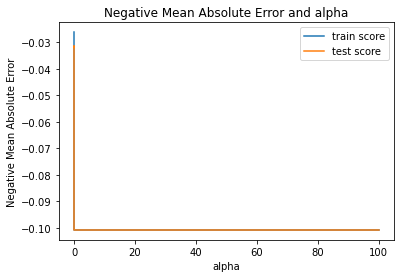

In [172]:
# plotting mean test and train scoes
lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('int32')

# plotting

plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.title("Negative Mean Absolute Error and alpha")
plt.ylabel('Negative Mean Absolute Error')

plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [210]:
lasso_df = pd.DataFrame({'Features':X_train_lr.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df.reset_index(drop=True, inplace=True)
lasso_df.sort_values("Coefficient", axis = 0, ascending = False,inplace = True, na_position ='first')
lasso_df.head(15)

Features  Coefficient
210               GrLivArea       0.2708
219              GarageCars       0.1069
213                FullBath       0.0463
43     Neighborhood_NridgHt       0.0411
217            TotRmsAbvGrd       0.0384
48     Neighborhood_Somerst       0.0369
49     Neighborhood_StoneBr       0.0359
224             ScreenPorch       0.0353
199  OverallQualRating_good       0.0321
42     Neighborhood_NoRidge       0.0288
33     Neighborhood_Crawfor       0.0277
16              MSZoning_RL       0.0245
201  OverallCondRating_good       0.0207
129         BsmtExposure_Gd       0.0206
211            BsmtFullBath       0.0189

In [201]:
metric_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Ridge Regression': rg_metric, 
        'Lasso Regression': lso_model
        }
met_df = pd.DataFrame(metric_table ,columns = ['Metric','Ridge Regression','Lasso Regression'] )
met_df

Metric  Ridge Regression  Lasso Regression
0  R2 Score (Train)          0.912748          0.905183
1   R2 Score (Test)          0.880880          0.885463
2       RSS (Train)          1.530520          1.663220
3        RSS (Test)          0.843845          0.811378
4       MSE (Train)          0.001499          0.001629
5        MSE (Test)          0.001927          0.001852

### Hyperparameter Value
#### Alpha value for Ridge - 4.0
#### Alpha value for Lasso - 0.0002


### Subjective Question Solution
Question 1
What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

In [202]:
# Display ridge alpha value
print(ridge_cv.best_params_)

{'alpha': 4.0}


In [203]:
#Fitting Ridge model for alpha = 0.4 and printing coefficients which have been penalised
alpha = 8.0    # Double of original alpha value
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_lr, y_train_lr)
print(ridge.coef_)

[-3.79566498e-02  2.64446686e-03 -6.29755127e-03  6.31315455e-03
 -1.62965827e-03  1.19279476e-02  1.34863853e-02 -7.06308424e-03
 -3.27966451e-03  6.27836544e-04 -6.80644493e-03 -2.02194621e-02
 -1.18086746e-02 -8.45674783e-03  1.93421068e-02  1.26358798e-02
  2.92626532e-02  1.04059914e-02  1.31760747e-02 -1.64058663e-02
  9.71887395e-04  1.18296144e-02  9.90918466e-04  1.55446890e-02
  1.70471701e-02 -1.69410502e-02 -5.40068058e-03 -7.70018220e-03
 -5.69569813e-04 -9.06415103e-04  1.61657546e-03  1.63398528e-02
 -7.01041814e-03  3.08543517e-02 -2.74773689e-02 -1.21810905e-02
 -3.78968629e-02 -2.83379487e-02 -7.97888585e-03 -9.66943574e-03
  3.08463056e-03 -5.41744167e-03  3.78516108e-02  3.26716120e-02
 -1.31666194e-02 -1.09202709e-02 -1.78864874e-02  2.81400349e-03
  2.89193570e-02  4.20145618e-02  2.26803741e-03  4.84734057e-03
 -9.03956111e-03  1.47685762e-02  4.89412867e-03 -3.68392474e-03
 -8.45141587e-03 -2.12420766e-03 -3.49654917e-03 -2.72813915e-03
 -9.85772888e-03  6.27836

In [204]:
# let us use the model to predict on train and test data and check the matrix

y_pred_train_ridge = ridge.predict(X_train_lr)
y_pred_test_ridge = ridge.predict(X_test_lm)
# y_train_lr  y_test_lm

rg_metric=[]
r2_train_ridge = r2_score(y_train_lr, y_pred_train_ridge)
print('R2(train) =',r2_train_ridge)
rg_metric.append(r2_train_ridge)

r2_test_ridge = r2_score(y_test_lm, y_pred_test_ridge)
print('R2(test) =',r2_test_ridge)
rg_metric.append(r2_test_ridge)



rss1_ridge = np.sum(np.square(y_train_lr - y_pred_train_ridge))
print('RSS(train) =',rss1_ridge)
rg_metric.append(rss1_ridge)
rss2_ridge = np.sum(np.square(y_test_lm - y_pred_test_ridge))
print('RSS(test) =',rss2_ridge)
rg_metric.append(rss2_ridge)


mse_train_ridge = mean_squared_error(y_train_lr, y_pred_train_ridge)
print('MSE(train) =',mse_train_ridge)
rg_metric.append(mse_train_ridge)
mse_test_ridge = mean_squared_error(y_test_lm, y_pred_test_ridge)
print('MSE(test) =',mse_test_ridge)
rg_metric.append(mse_test_ridge)


R2(train) = 0.9057736635777706
R2(test) = 0.8802513512300466
RSS(train) = 1.6528647929530234
RSS(test) = 0.8482965155313085
MSE(train) = 0.0016188685533330297
MSE(test) = 0.0019367500354596084


In [205]:
ridge_df = pd.DataFrame({'Features':X_train_lr.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df.sort_values("Coefficient", axis = 0, ascending = False,
                 inplace = True, na_position ='first')
ridge_df.head(10)

Features  Coefficient
210             GrLivArea       0.0669
219            GarageCars       0.0664
213              FullBath       0.0601
217          TotRmsAbvGrd       0.0562
228          totalBuiltSF       0.0426
49   Neighborhood_StoneBr       0.0420
224           ScreenPorch       0.0402
42   Neighborhood_NoRidge       0.0379
43   Neighborhood_NridgHt       0.0327
33   Neighborhood_Crawfor       0.0309

In [206]:
#lasso
print(lasso_cv.best_params_)

{'alpha': 0.0002}


In [207]:
#Fitting lasso model for alpha = 0.0002 

alpha =0.0004 # Double of original alpha value

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_lr, y_train_lr)

Lasso(alpha=0.0004)

In [209]:
# Put the Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train_lr.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df.reset_index(drop=True, inplace=True)
lasso_df.sort_values("Coefficient", axis = 0, ascending = False,
                 inplace = True, na_position ='first')
lasso_df.head(15)

Features  Coefficient
210               GrLivArea       0.2708
219              GarageCars       0.1069
213                FullBath       0.0463
43     Neighborhood_NridgHt       0.0411
217            TotRmsAbvGrd       0.0384
48     Neighborhood_Somerst       0.0369
49     Neighborhood_StoneBr       0.0359
224             ScreenPorch       0.0353
199  OverallQualRating_good       0.0321
42     Neighborhood_NoRidge       0.0288
33     Neighborhood_Crawfor       0.0277
16              MSZoning_RL       0.0245
201  OverallCondRating_good       0.0207
129         BsmtExposure_Gd       0.0206
211            BsmtFullBath       0.0189

### Question 3:
After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?




In [211]:
X_train_drop=X_train_lr.drop(['GrLivArea','GarageCars','FullBath','Neighborhood_NridgHt','TotRmsAbvGrd'],axis=1)

In [212]:
lasso = Lasso()
# List of alpha to tune
params = {'alpha': [ 0.0001, 0.0002, 0.001, 0.002, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 
                    2.0, 3.0, 4.0,5.0, 6.0,7.0, 8.0, 9.0, 10.0, 25, 50, 100] }
folds=10
# cross validation
lasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_cv.fit(X_train_drop, y_train_lr) 
## ridge_cv.fit(X_train_rfe, y_train_lr)

Fitting 10 folds for each of 26 candidates, totalling 260 fits


GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.001, 0.002, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 25, 50,
                                   100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [213]:
print( lasso_cv.best_params_)

{'alpha': 0.0002}


In [214]:
alpha =0.0002

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_drop, y_train_lr)



#y_pred_train_drop_lasso = lasso.predict(X_train_drop)
#y_pred_test_drop_lasso = lasso.predict(X_test_rfe)

Lasso(alpha=0.0002)

In [215]:
lasso_df = pd.DataFrame({'Features':X_train_drop.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df.reset_index(drop=True, inplace=True)
lasso_df.sort_values("Coefficient", axis = 0, ascending = False,inplace = True, na_position ='first')
lasso_df.head(10)

Features  Coefficient
223            totalBuiltSF       0.4172
212            BedroomAbvGr       0.0618
219             ScreenPorch       0.0460
198  OverallQualRating_good       0.0365
48     Neighborhood_StoneBr       0.0359
33     Neighborhood_Crawfor       0.0296
42     Neighborhood_NoRidge       0.0282
204              MasVnrArea       0.0267
47     Neighborhood_Somerst       0.0264
215              WoodDeckSF       0.0258

#### The next 5 most important model will be
totalBuiltSF  ,
BedroomAbvGr  ,
ScreenPorch  ,
OverallQualRating_good  ,
Neighborhood_StoneBr
